# **Prediksi Default Pembayaran Kartu Kredit**

# **Import Library**

In [1]:
!pip install scikit-learn==1.5.1
!pip install --upgrade scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


### **Insight:**
Bagian ini menunjukkan upaya instalasi dan upgrade beberapa pustaka yang sangat umum digunakan dalam machine learning dan deep learning.
- scikit-learn: Pustaka inti untuk algoritma machine learning tradisional (klasifikasi, regresi, clustering, dll.). Versi spesifik 1.5.1 diinstal.
- scikeras: Pustaka ini berfungsi sebagai wrapper atau jembatan yang memungkinkan model Keras (kerangka kerja deep learning) diintegrasikan dengan API scikit-learn. Ini sangat berguna untuk menggunakan alat-alat scikit-learn seperti GridSearchCV atau Pipeline dengan model Keras.
- "Requirement already satisfied": Pesan ini mendominasi output, menunjukkan bahwa sebagian besar dependensi yang diperlukan oleh scikit-learn dan scikeras (seperti numpy, scipy, threadpoolctl, joblib, packaging, optree, ml-dtypes, markdown-it-py, rich, pygments) sudah terinstal dengan versi yang sesuai atau lebih baru. Ini menandakan lingkungan Python yang kemungkinan besar sudah memiliki banyak pustaka data science yang terinstal sebelumnya.

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.1 MB/s eta 0:00:00


### **Insight:**
Insight: Bagian ini berfokus pada instalasi keras-tuner.
- keras-tuner: Ini adalah pustaka yang dirancang khusus untuk hyperparameter tuning otomatis untuk model-model Keras. Hyperparameter tuning adalah proses mencari kombinasi hyperparameter terbaik (misalnya, learning rate, jumlah layer, jumlah neuron per layer) yang menghasilkan kinerja model optimal.
- "Requirement already satisfied": Sama seperti bagian sebelumnya, sebagian besar dependensi keras-tuner (seperti numpy, packaging, requests, absl-py, optree, ml-dtypes, certifi, urllib3, idna, charset-normalizer) juga sudah terinstal. Ini kembali menegaskan bahwa lingkungan ini sudah kaya akan pustaka terkait pengembangan deep learning.

In [3]:
# General-purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn core modules
import sklearn
import scikeras
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

# Scikit-learn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Deep learning and wrappers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import F1Score
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from scikeras.wrappers import KerasClassifier
import keras_tuner as kt


# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# XGBoost
from xgboost import XGBClassifier

### **Insight:**
Bagian ini adalah persiapan untuk proyek pemodelan prediktif yang kuat dan menyeluruh, yang kemungkinan besar akan melibatkan:

- Analisis Data dan Visualisasi: Menggunakan numpy, pandas, matplotlib, seaborn.
Machine Learning Tradisional: Dengan berbagai algoritma klasifikasi (LogisticRegression, RandomForest, SVC, KNeighborsClassifier) dan teknik pra-pemrosesan (StandardScaler, OneHotEncoder, SimpleImputer), feature engineering (ColumnTransformer), pipeline, serta evaluasi model yang cermat (accuracy_score, confusion_matrix, roc_curve, dll.) dari scikit-learn. Juga mencakup pencarian hyperparameter (GridSearchCV, RandomizedSearchCV).
- Deep Learning: Membangun dan melatih neural networks menggunakan TensorFlow dan Keras, termasuk berbagai layer (Dense, Dropout, BatchNormalization), optimizer (Adam, SGD, RMSprop), dan callback (EarlyStopping, ReduceLROnPlateau).
Integrasi ML & DL: Memanfaatkan scikeras untuk menggabungkan model Keras ke dalam workflow scikit-learn dan keras-tuner untuk hyperparameter tuning model Keras secara otomatis.
- Penanganan Data Tidak Seimbang: Menggunakan imblearn (SMOTETomek, SMOTE) untuk mengatasi masalah ketidakseimbangan kelas dalam dataset, yang umum terjadi dalam kasus deteksi anomali atau default kredit.
Model Berkinerja Tinggi: Menggunakan XGBoost (XGBClassifier), sebuah algoritma gradient boosting yang sangat populer karena performa dan efisiensinya.

In [4]:
# Set style for plots
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

### **Insight:**
langkah ini untuk mempercantik dan menyeragamkan tampilan visualisasi data, membuat grafik lebih mudah dibaca dan presentabel.

- plt.style.use('fivethirtyeight'): Mengatur gaya plot matplotlib agar terlihat mirip dengan gaya grafik di situs berita data FiveThirtyEight, yang dikenal bersih dan informatif.
- sns.set(style='whitegrid'): Mengatur gaya plot seaborn agar memiliki latar belakang putih dengan garis-garis grid, yang seringkali membantu dalam membaca nilai data.

# **Pemahaman Dataset**

Dataset ini berisi informasi mengenai pembayaran macet, faktor demografi, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit.

**Detail Dataset:**
- Jumlah Baris: 30.000
- Jumlah Kolom (Variabel): 25

**Detail Variabel:**
1. ID: ID unik setiap klien.
2. LIMIT_BAL: Jumlah kredit yang diberikan dalam NT dollar (termasuk kredit individu dan keluarga/tambahan).
3. SEX: Jenis kelamin (1=laki-laki, 2=perempuan).
4. EDUCATION: Tingkat pendidikan (1=pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui).
5. MARRIAGE: Status perkawinan (1=menikah, 2=lajang, 3=lainnya).
6. AGE: Usia dalam tahun.
7. PAY_0: Status pembayaran di September 2005 (-1=bayar tepat waktu, 1=telat bayar satu bulan, 2=telat bayar dua bulan, ... 8=telat bayar delapan bulan, 9=telat bayar sembilan bulan atau lebih).
8. PAY_2: Status pembayaran di Agustus 2005 (skala sama dengan di atas).
9. PAY_3: Status pembayaran di Juli 2005 (skala sama dengan di atas).
10. PAY_4: Status pembayaran di Juni 2005 (skala sama dengan di atas).
11. PAY_5: Status pembayaran di Mei 2005 (skala sama dengan di atas).
12. PAY_6: Status pembayaran di April 2005 (skala sama dengan di atas).
13. BILL_AMT1: Jumlah tagihan di September 2005 (NT dollar).
14. BILL_AMT2: Jumlah tagihan di Agustus 2005 (NT dollar).
15. BILL_AMT3: Jumlah tagihan di Juli 2005 (NT dollar).
16. BILL_AMT4: Jumlah tagihan di Juni 2005 (NT dollar).
17. BILL_AMT5: Jumlah tagihan di Mei 2005 (NT dollar).
18. BILL_AMT6: Jumlah tagihan di April 2005 (NT dollar).
19. PAY_AMT1: Jumlah pembayaran sebelumnya di September 2005 (NT dollar).
20. PAY_AMT2: Jumlah pembayaran sebelumnya di Agustus 2005 (NT dollar).
21. PAY_AMT3: Jumlah pembayaran sebelumnya di Juli 2005 (NT dollar).
22. PAY_AMT4: Jumlah pembayaran sebelumnya di Juni 2005 (NT dollar).
23. PAY_AMT5: Jumlah pembayaran sebelumnya di Mei 2005 (NT dollar).
24. PAY_AMT6: Jumlah pembayaran sebelumnya di April 2005 (NT dollar).
25. default.payment.next.month: Status default pembayaran bulan berikutnya (1=ya, 0=tidak).

# **Data Loading**

In [5]:
# load the dataset
url = 'https://raw.githubusercontent.com/richellevania/Submission-Predictive-Analytics/main/credit_card.csv'
df = pd.read_csv(url)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### **Insight:**
Memuat dataset klien kartu kredit dari URL GitHub ke dalam DataFrame df, yang merupakan langkah pertama yang krusial. Dataset tersebut memiliki 30.000 baris dan 25 kolom, berisi informasi detail tentang pelanggan kartu kredit, riwayat pembayaran, jumlah tagihan, dan yang terpenting, kolom target default.payment.next.month yang kemungkinan besar akan digunakan untuk memprediksi apakah klien akan mengalami gagal bayar. Ini menandakan bahwa proyek ini akan fokus pada analisis dan pemodelan prediksi gagal bayar kartu kredit.

# **Exploratory Data Analysis (EDA)**

## Deskripsi Variabel

In [6]:
# Basic information about the dataset
print("\nBasic Information:")
df.info()



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2  

### Insight:
Hasil ini menunjukkan bahwa dataset dalam kondisi sangat bersih dan lengkap:
- Tidak ada nilai yang hilang (missing values) di kolom mana pun (semua kolom menunjukkan 30000 non-null), yang berarti data siap untuk analisis lebih lanjut tanpa perlu penanganan missing values.
- Tipe data (int64 dan float64) juga sudah sesuai untuk kolom-kolom numerik, menandakan data sudah dalam format yang tepat untuk pemrosesan dan pemodelan.

In [7]:
# Statistical summary of the dataset
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### **Insight:**
Ringkasan ini memberikan gambaran umum tentang distribusi dan jangkauan setiap kolom numerik dalam dataset. Poin-poin penting yang terungkap adalah:
- Variabilitas Data: Terdapat rentang nilai yang sangat luas untuk kolom-kolom seperti LIMIT_BAL, BILL_AMT, dan PAY_AMT, menunjukkan keragaman besar dalam jumlah kredit, tagihan, dan pembayaran klien.
- Pola Pembayaran: Kolom PAY_0 hingga PAY_6 (status pembayaran) menunjukkan sebagian besar klien cenderung membayar tepat waktu atau dengan sedikit keterlambatan (nilai rata-rata mendekati nol atau negatif), meskipun ada juga kasus keterlambatan parah (nilai maksimum hingga 8).
- Potensi Kategori: Kolom seperti SEX, EDUCATION, dan MARRIAGE memiliki nilai minimum dan maksimum yang kecil (1-2, 0-6, 0-3), menegaskan bahwa meskipun numerik, mereka sebenarnya adalah fitur kategorikal yang perlu dipertimbangkan secara khusus.
- Data Imbalance: Kolom target default.payment.next.month memiliki rata-rata sekitar 0.221, yang berarti sekitar 22.1% dari klien mengalami gagal bayar. Ini mengindikasikan dataset yang tidak seimbang (imbalanced dataset), sebuah isu penting yang perlu ditangani dalam pemodelan untuk mencegah bias pada kelas mayoritas.
- Variabel target biner (0 atau 1), di mana 1 menandakan gagal bayar dan 0 menandakan tidak gagal bayar.

In [8]:
# Memeriksa jumlah nilai unik per kolom
print("\nJumlah nilai unik per kolom:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


Jumlah nilai unik per kolom:
ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48

### **Insight:**
Pemeriksaan nilai unik ini memberikan detail penting tentang karakteristik setiap fitur:
1. Variabel Kategorikal:
    - Kolom SEX ([2 1]), EDUCATION ([2 1 3 5 4 6 0]), dan MARRIAGE ([1 2 3 0]) dikonfirmasi sebagai variabel kategorikal. Adanya nilai 0 pada EDUCATION dan MARRIAGE mungkin perlu ditangani (misalnya, sebagai "unknown" atau "lain-lain").
    - Kolom PAY_0 hingga PAY_6 juga menunjukkan serangkaian nilai unik ([-2 -1 0 2 3 4 5 6 7 8]) yang merepresentasikan status pembayaran berbeda (misalnya, -1 untuk membayar penuh, 0 untuk membayar tepat waktu, dan nilai positif untuk keterlambatan). Ini adalah fitur kategorikal ordinal.
2. Variabel Numerik:
    - Kolom ID, LIMIT_BAL, AGE, BILL_AMT (1-6), dan PAY_AMT (1-6) memiliki banyak nilai unik, yang sesuai untuk variabel numerik kontinu atau diskrit dengan rentang luas.
3. Variabel Target:
    - Kolom default.payment.next.month memiliki nilai unik [1 0], mengkonfirmasi statusnya sebagai variabel target biner (klasifikasi).


Class Distribution:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
default.payment.next.month
0    77.9
1    22.1
Name: proportion, dtype: float64


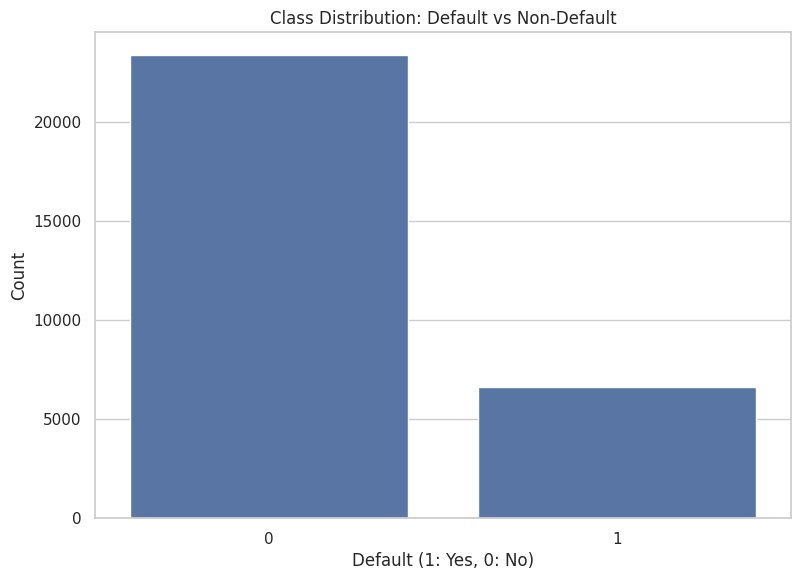

In [9]:
# Understanding the class distribution
print("\nClass Distribution:")
print(df['default.payment.next.month'].value_counts())
print(df['default.payment.next.month'].value_counts(normalize=True).round(3) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Class Distribution: Default vs Non-Default')
plt.xlabel('Default (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

### **Insight:**
Analisis ini mengkonfirmasi dan memvisualisasikan ketidakseimbangan kelas (class imbalance) yang signifikan pada variabel target:
- Ada 23.364 klien yang tidak gagal bayar (0), yang merupakan 77.9% dari total dataset.
- Hanya ada 6.636 klien yang gagal bayar (1), yang merupakan 22.1% dari total dataset.

Visualisasi countplot juga memperlihatkan perbedaan jumlah yang sangat mencolok antara kedua kelas ini.

## Distribusi Fitur

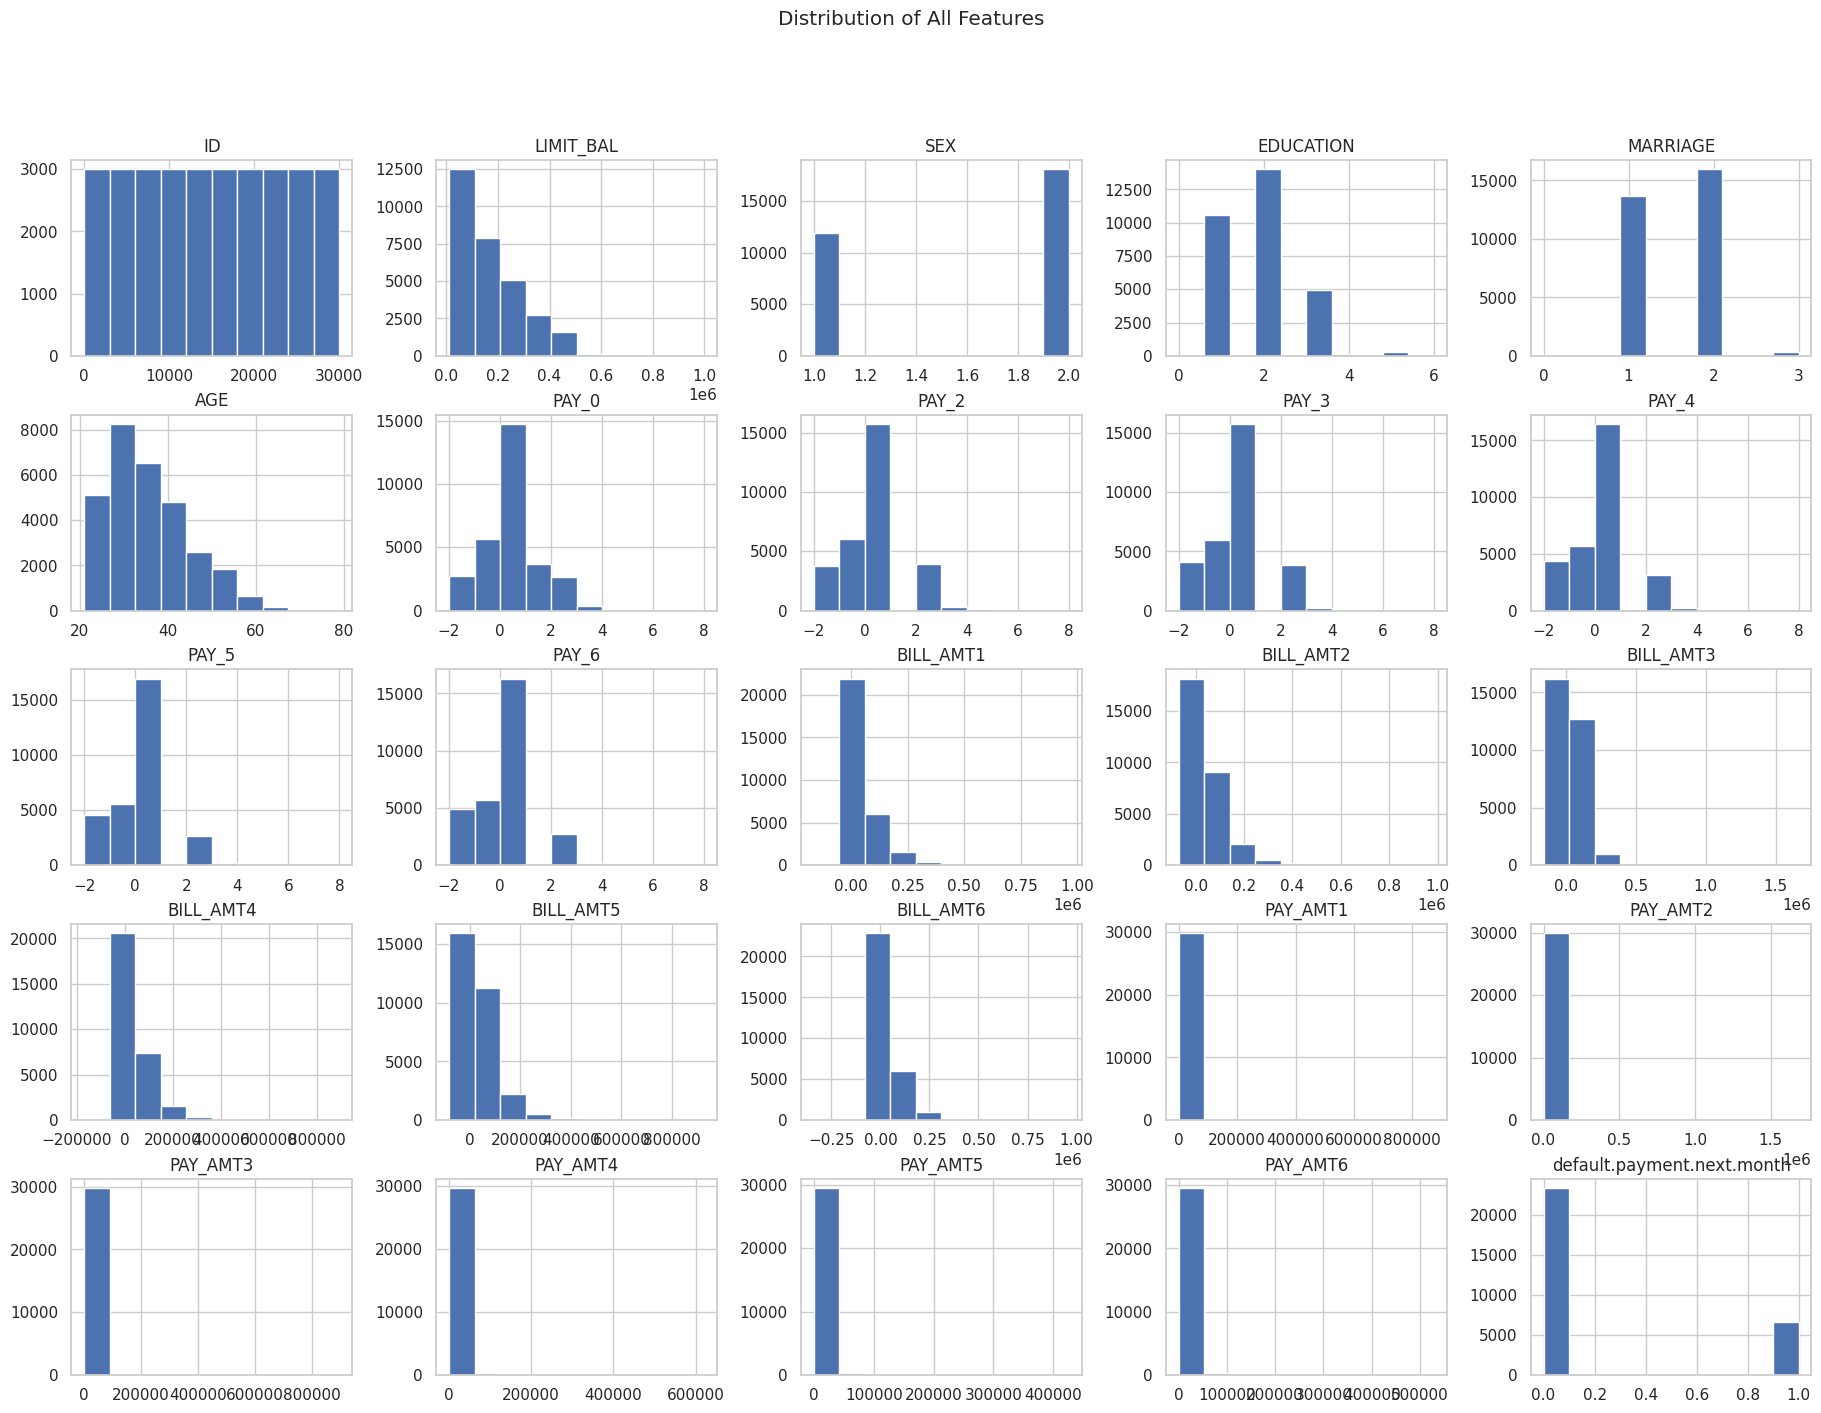

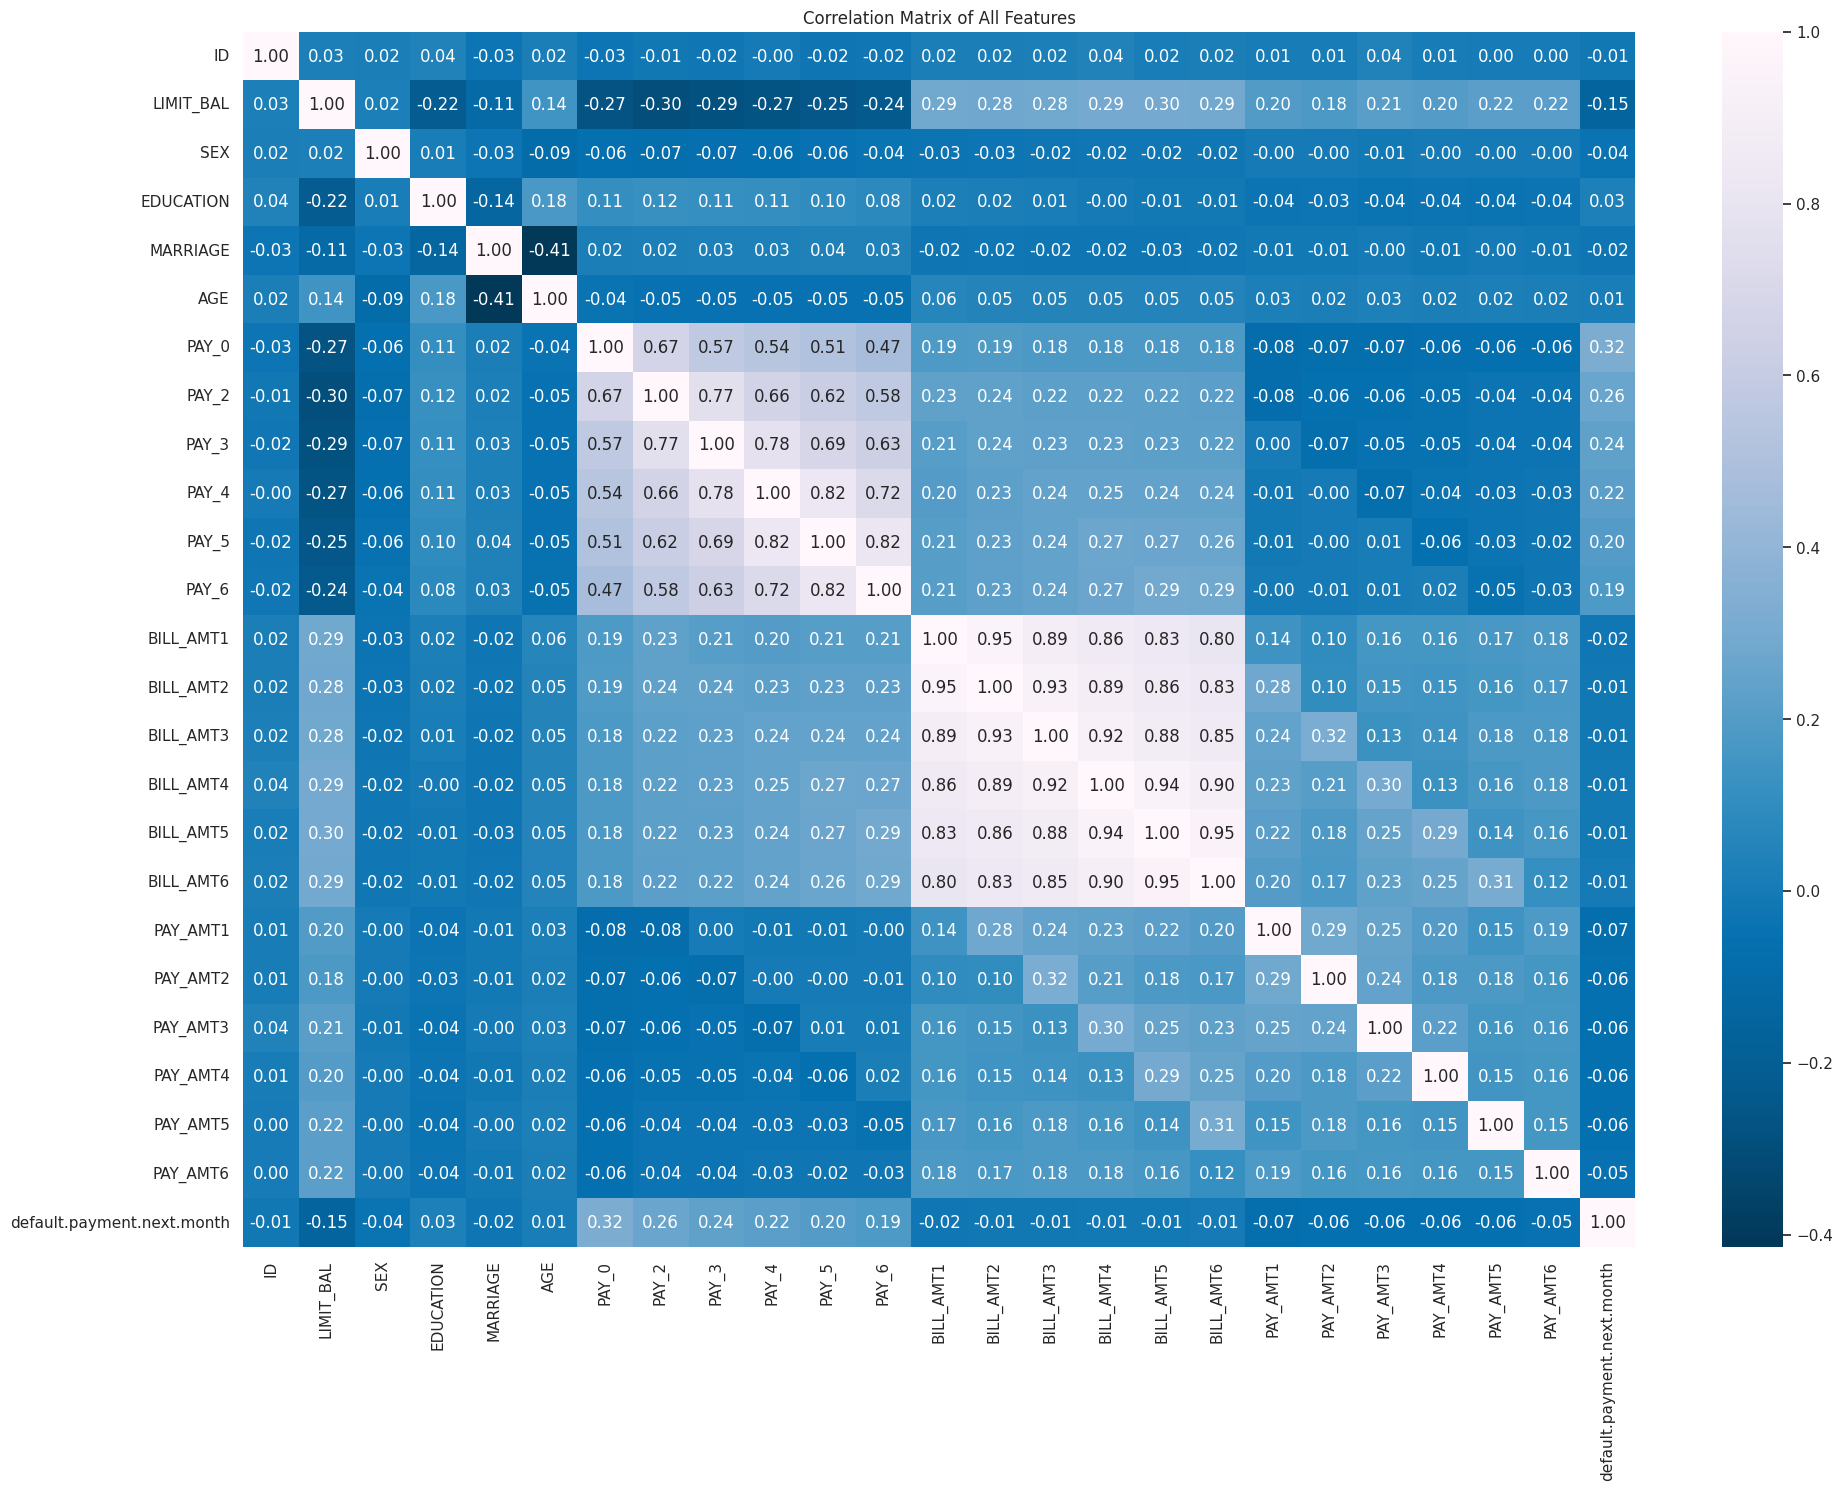

In [10]:
# Visualize distribution of all features
df.hist(figsize=(20, 15))
plt.suptitle('Distribution of All Features')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='PuBu_r', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

### **Insight:**
Visualisasi distribusi fitur melalui histogram ini memberikan gambaran tentang sebaran nilai setiap kolom numerik dalam dataset.
- Distribusi Miring (Skewed Distribution):
  - Sebagian besar kolom yang terkait dengan jumlah uang (LIMIT_BAL, BILL_AMT1 hingga BILL_AMT6, PAY_AMT1 hingga PAY_AMT6) menunjukkan distribusi yang sangat miring ke kanan (right-skewed). Ini berarti bahwa mayoritas klien memiliki nilai yang lebih rendah (misalnya, batas kredit kecil, tagihan atau pembayaran kecil), tetapi ada sejumlah kecil klien dengan nilai yang sangat tinggi (ekstrem).
  - Implikasi: Fitur-fitur dengan kemiringan ekstrem seperti ini seringkali memerlukan transformasi data (contoh: log-transformasi) sebelum digunakan dalam beberapa algoritma machine learning (seperti regresi linier atau model berbasis jarak) yang mengasumsikan distribusi data lebih normal atau simetris.

- Variabel Kategorikal/Ordinal yang Direpresentasikan Numerik:
  - Kolom PAY_0 hingga PAY_6 (status pembayaran) menunjukkan distribusi yang diskrit, dengan frekuensi tinggi pada nilai tertentu (misalnya, 0 untuk pembayaran tepat waktu, -1 atau -2 untuk status khusus, dan nilai positif untuk keterlambatan). Ini menegaskan bahwa meskipun numerik, kolom-kolom ini berperilaku seperti variabel kategorikal atau ordinal.
  - Kolom seperti SEX, EDUCATION, dan MARRIAGE (meskipun mungkin tidak semua terlihat jelas di screenshot ini, dari df.info() sebelumnya kita tahu mereka ada) juga akan menunjukkan distribusi diskrit dengan beberapa kategori.

Matriks korelasi ini menunjukkan tingkat dan arah hubungan linier antara setiap pasang fitur dalam dataset.

- Korelasi Kuat antar Fitur Sekuensial:
  - Terdapat korelasi positif yang sangat kuat antara kolom BILL_AMT yang berurutan (misalnya, BILL_AMT1 dengan BILL_AMT2, BILL_AMT2 dengan BILL_AMT3, dst.). Hal yang sama berlaku untuk kolom PAY_AMT yang berurutan. Ini wajar, karena tagihan dan pembayaran di bulan-bulan yang berdekatan cenderung mirip.
  - Kolom PAY_X (status pembayaran) juga menunjukkan korelasi positif yang signifikan antar bulannya, mengindikasikan konsistensi perilaku pembayaran klien dari waktu ke waktu.

- Korelasi dengan Variabel Target (default.payment.next.month):
  - Kolom PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, dan PAY_6 (yang menunjukkan status keterlambatan pembayaran) memiliki korelasi positif yang paling kuat dengan variabel target. Ini berarti semakin tinggi nilai PAY_X (semakin parah keterlambatan pembayaran), semakin besar kemungkinan klien akan gagal bayar. Ini adalah indikator prediksi yang sangat penting.
  - LIMIT_BAL (batas kredit) kemungkinan memiliki korelasi negatif yang moderat dengan variabel target, mengindikasikan bahwa klien dengan batas kredit lebih tinggi cenderung tidak gagal bayar.

- Multikolinearitas:
  - Adanya korelasi yang sangat kuat antar fitur (BILL_AMT atau PAY_AMT yang berurutan) menunjukkan adanya multikolinearitas. Ini perlu dipertimbangkan saat membangun model, karena beberapa algoritma machine learning sensitif terhadap masalah ini (misalnya, regresi linier).

# **Preprocessing**

## Menghapus Column ID

In [11]:
# drop ID column because it is not needed for modeling
df = df.drop('ID', axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Insight:
Penghapusan kolom 'ID' pada dataset yang cukup besar dan digunakan untuk membangun model untuk memprediksi risiko gagal bayar.
Kolom ID dihapus karena berikut:
- Tidak Relevan untuk Pemodelan (Non-Prediktif): Kolom 'ID' adalah pengidentifikasi unik untuk setiap baris atau entitas (misalnya, pelanggan). Meskipun penting untuk identifikasi data dan penggabungan dataset, 'ID' itu sendiri tidak mengandung informasi yang dapat digunakan untuk memprediksi atau menjelaskan variabel target (dalam kasus ini, default.payment.next.month). 'ID' hanyalah label arbitrer yang tidak memiliki hubungan kausal atau korelatif dengan perilaku yang ingin diprediksi.

- Menghindari Overfitting yang Tidak Disengaja: Jika kolom 'ID' dibiarkan dalam dataset dan digunakan untuk pelatihan model, model mungkin secara tidak sengaja "mempelajari" atau mengasosiasikan 'ID' tertentu dengan hasil tertentu. Hal ini akan menyebabkan model memiliki performa yang sangat baik pada data pelatihan (karena ia hanya menghafal ID), tetapi performanya akan sangat buruk pada data baru atau yang belum pernah dilihat (unseen data) karena 'ID' tersebut tidak akan ada atau tidak memiliki makna prediktif. Ini adalah bentuk overfitting yang ekstrem

## Menangani Missing Value

In [12]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


### **Insight:**
Dataset ini tidak memiliki missing values (nilai yang hilang) di semua kolom yang ditampilkan. Ini ditunjukkan oleh angka "0" di samping setiap nama kolom setelah menjalankan df.isnull().sum(). Ini adalah kabar baik karena berarti tidak ada langkah pra-pemrosesan data tambahan yang diperlukan untuk menangani nilai yang hilang, sehingga data sudah bersih dalam aspek ini dan siap untuk analisis atau pemodelan lebih lanjut.

## Menangani Duplikat Data

In [13]:
# Check for duplicate rows
print("\nJumlah baris duplikat:", df.duplicated().sum())

# Drop duplicate rows if any
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Baris duplikat telah dihapus.")
    print("Jumlah baris setelah penghapusan duplikat:", len(df))
else:
    print("Tidak ada baris duplikat yang ditemukan.")


Jumlah baris duplikat: 35
Baris duplikat telah dihapus.
Jumlah baris setelah penghapusan duplikat: 29965


### **Insight:**
Dataset awalnya memiliki 35 baris duplikat, dan baris-baris duplikat tersebut telah berhasil dihapus. Ini adalah langkah penting dalam pra-pemrosesan data untuk memastikan kualitas data dan mencegah bias dalam analisis atau model. Setelah penghapusan, setiap baris dalam dataset sekarang unik.

## Menangani Outlier

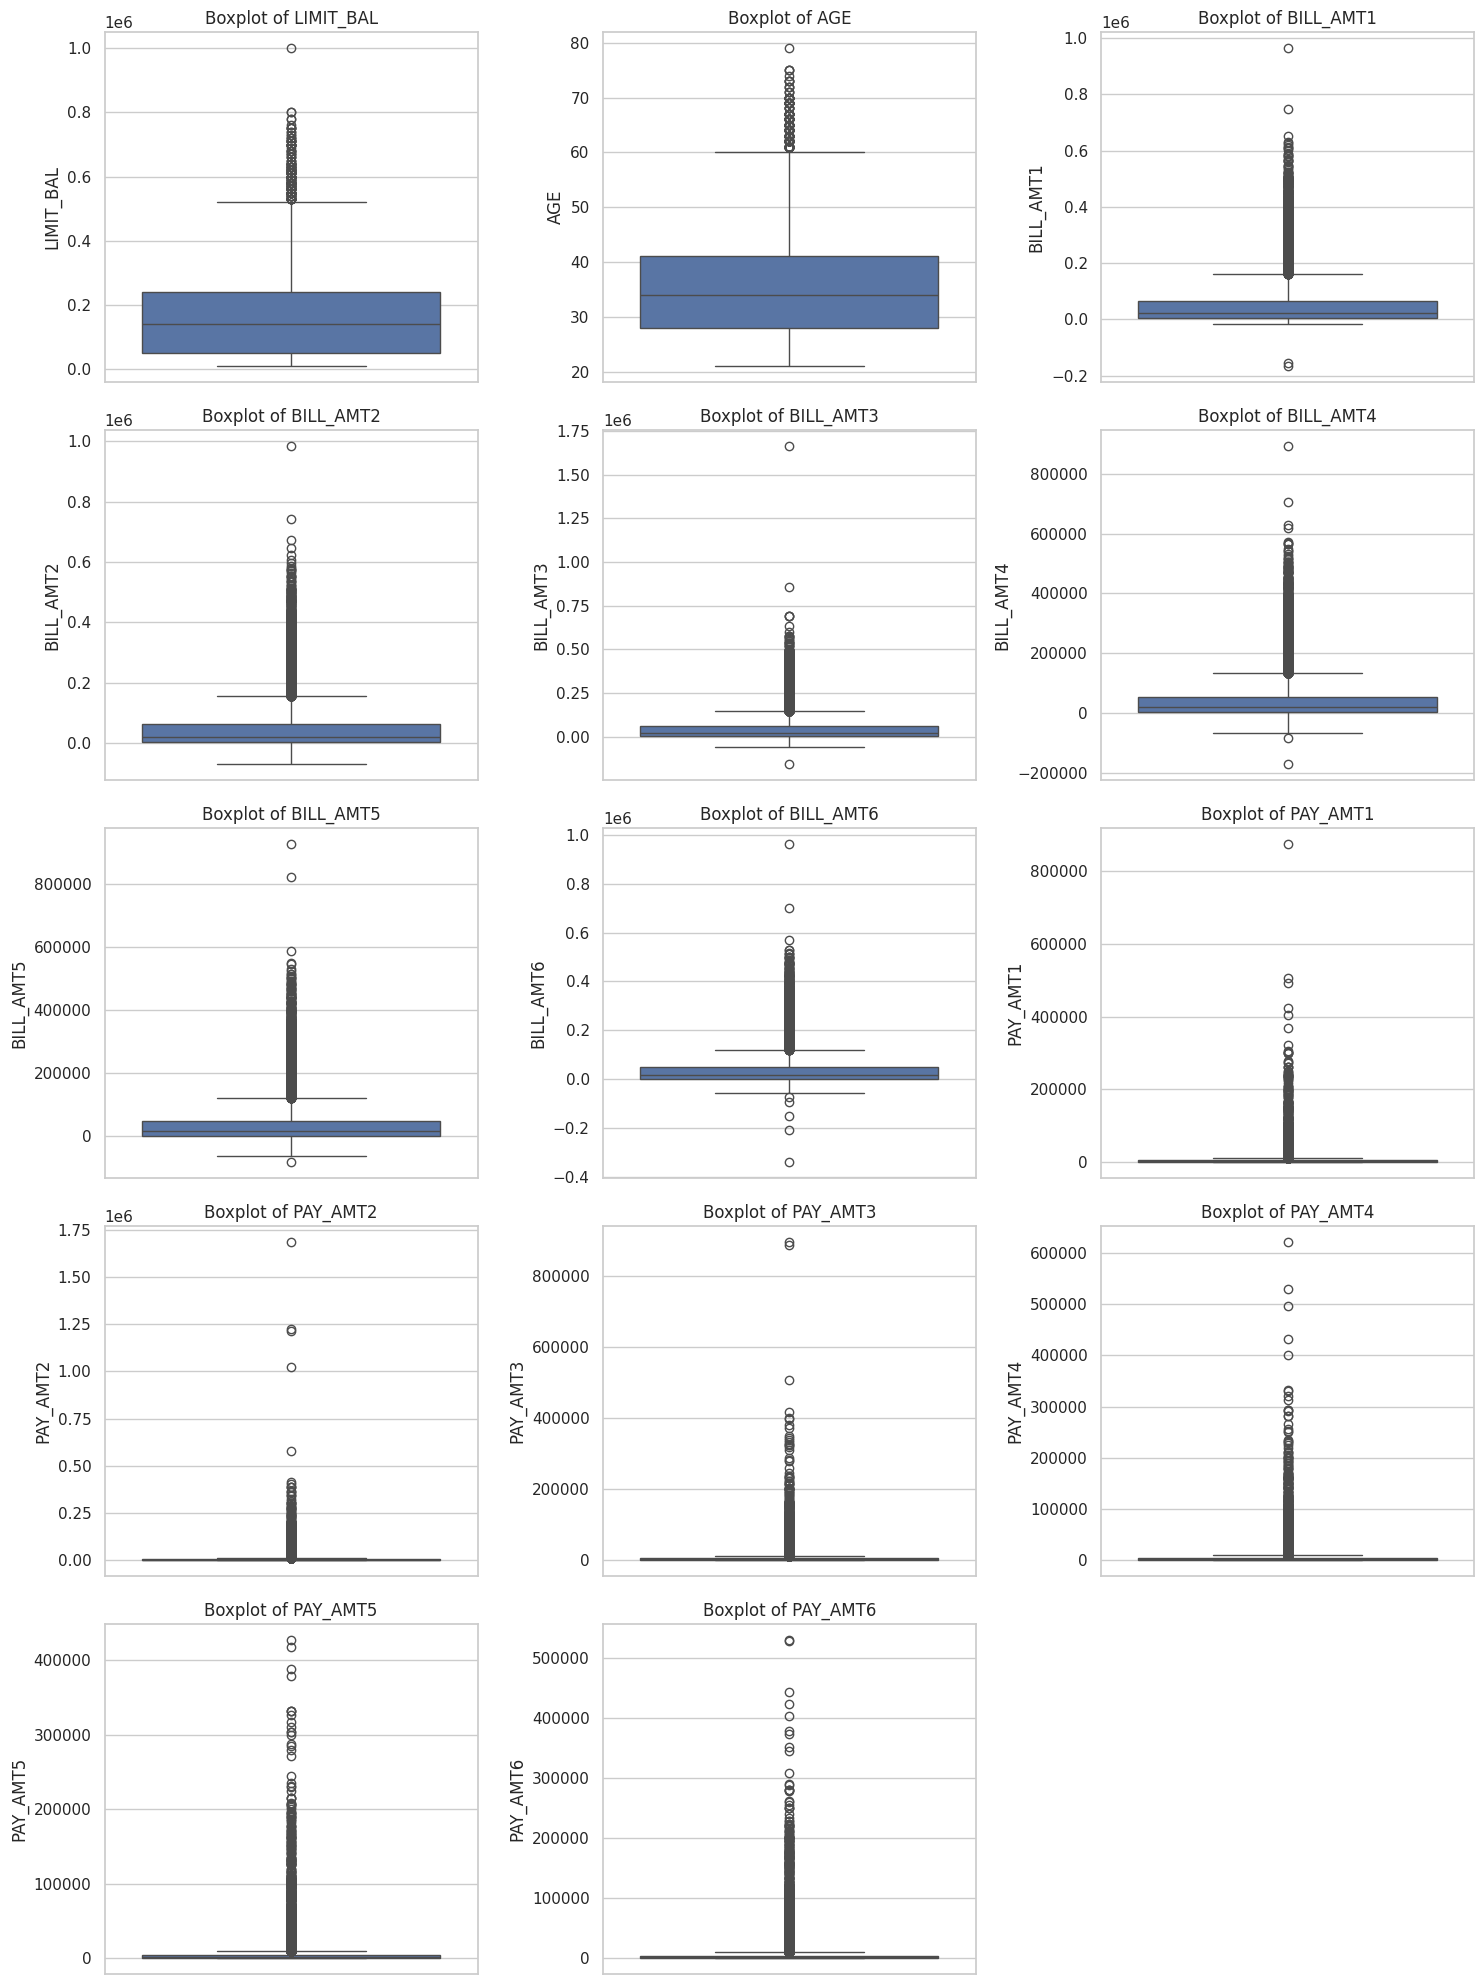


Jumlah baris sebelum penanganan outlier pada LIMIT_BAL: 29965
Jumlah baris setelah penanganan outlier pada LIMIT_BAL: 29798


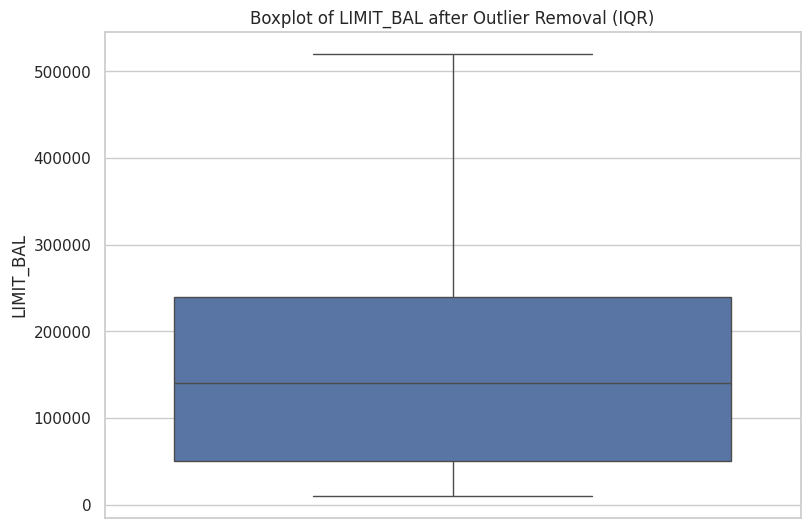


Jumlah baris setelah penanganan outlier pada semua kolom numerik (IQR): 14455


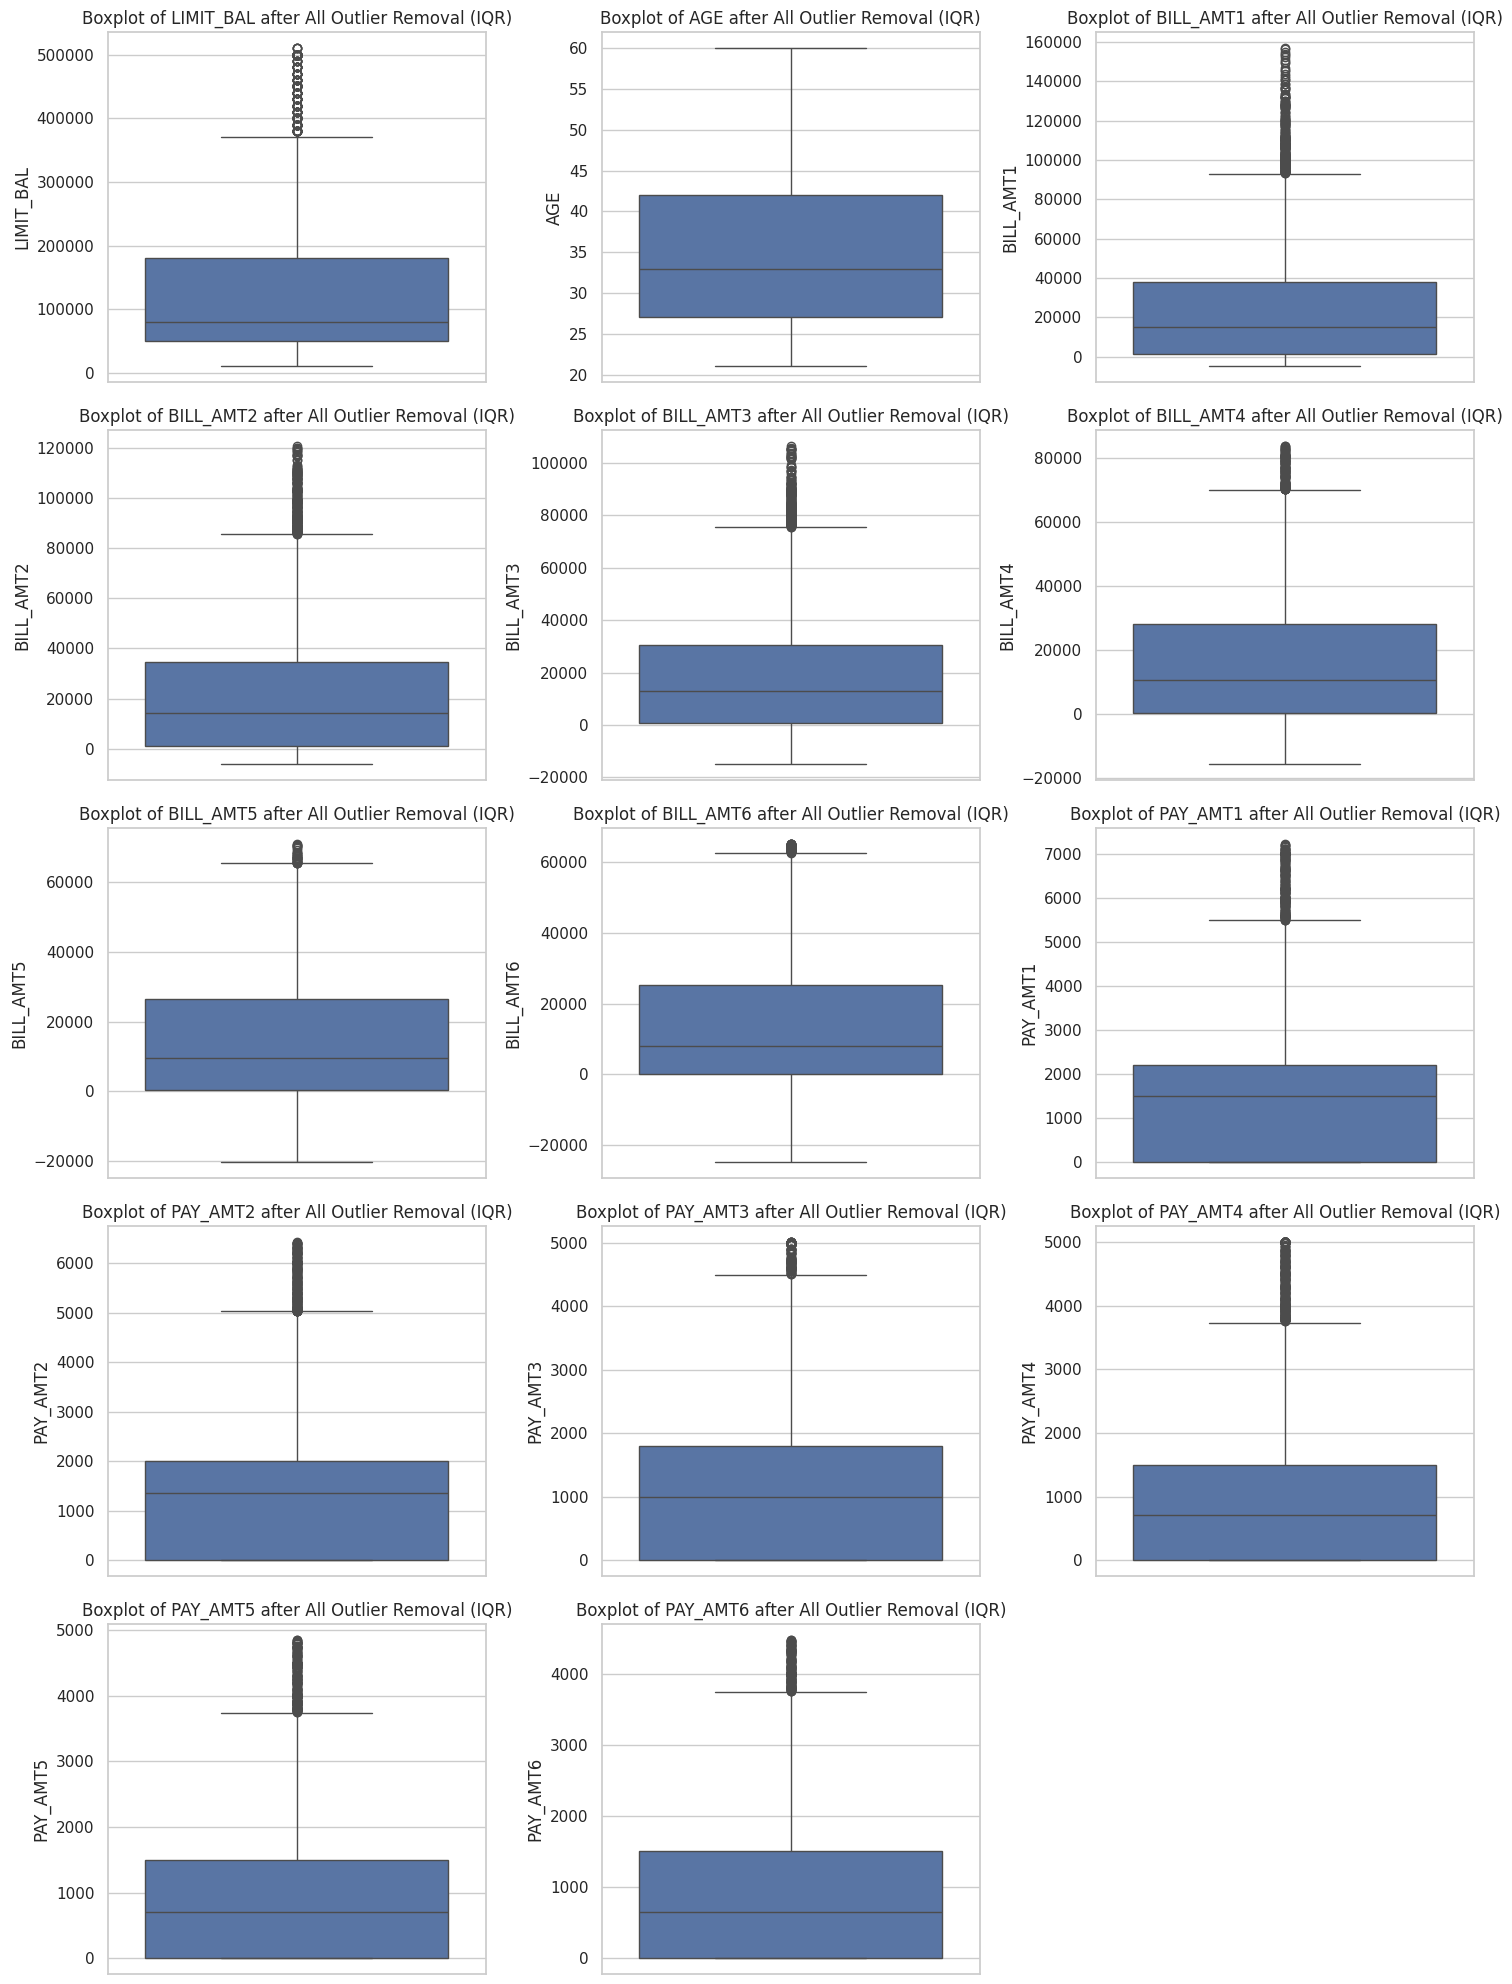


Statistical Summary after Capping Outliers:
           LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count   29965.000000  29965.000000   29965.000000   29965.000000   
mean   166924.567996     35.451894   44374.434774   42461.434807   
std    128023.825407      9.107477   51370.279773   49314.698319   
min     10000.000000     21.000000  -91902.500000  -69777.000000   
25%     50000.000000     28.000000    3595.000000    3010.000000   
50%    140000.000000     34.000000   22438.000000   21295.000000   
75%    240000.000000     41.000000   67260.000000   64109.000000   
max    525000.000000     60.500000  162757.500000  155757.500000   

           BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count   29965.000000   29965.000000   29965.000000   29965.000000   
mean    40174.250859   36609.991156   33802.991891   32644.233005   
std     46711.194522   42795.178795   39924.114900   39400.352848   
min    -83524.000000  -76001.500000  -70903.000000  -70723.000000 

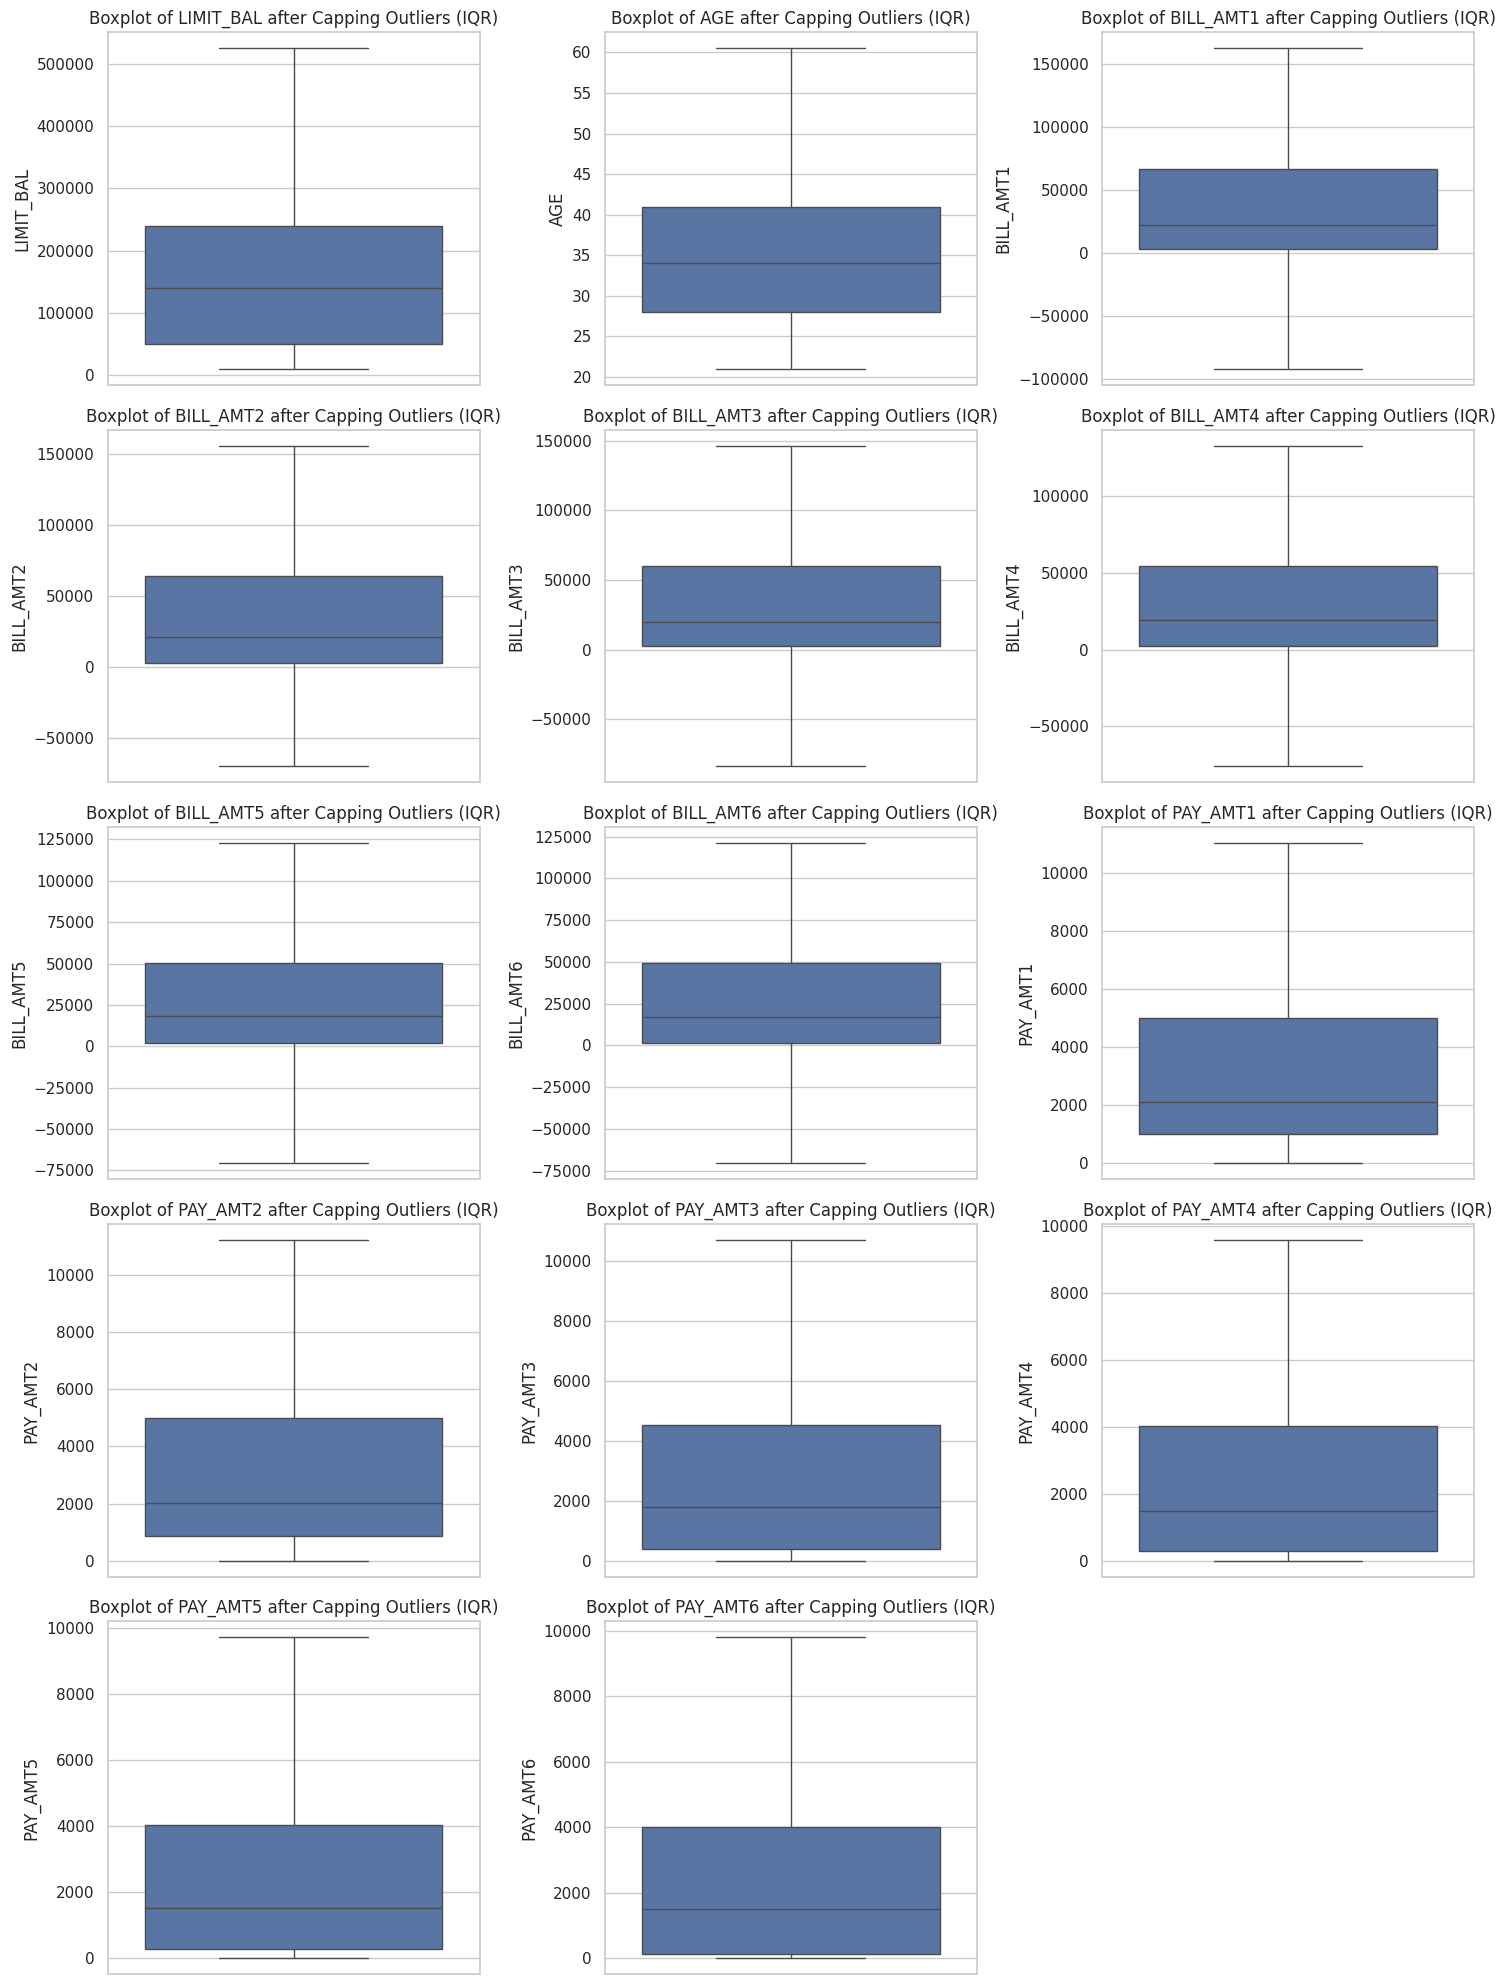

In [14]:
# Identifikasi Outlier menggunakan Boxplot
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Penanganan Outlier (Contoh: menggunakan IQR untuk kolom 'LIMIT_BAL')
# Hitung IQR untuk 'LIMIT_BAL'
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
df_no_outliers_limit_bal = df[(df['LIMIT_BAL'] >= lower_bound) & (df['LIMIT_BAL'] <= upper_bound)].copy()

print(f"\nJumlah baris sebelum penanganan outlier pada LIMIT_BAL: {len(df)}")
print(f"Jumlah baris setelah penanganan outlier pada LIMIT_BAL: {len(df_no_outliers_limit_bal)}")

# Visualisasi setelah penanganan outlier pada LIMIT_BAL
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers_limit_bal['LIMIT_BAL'])
plt.title('Boxplot of LIMIT_BAL after Outlier Removal (IQR)')
plt.ylabel('LIMIT_BAL')
plt.show()

# Catatan: Anda dapat mengadaptasi metode IQR atau metode lain (seperti Z-score atau transformasi)
# untuk kolom numerik lainnya sesuai dengan kebutuhan analisis Anda.
# Penerapan IQR pada semua kolom numerik
df_cleaned_outliers = df.copy()
for col in numerical_cols:
    Q1 = df_cleaned_outliers[col].quantile(0.25)
    Q3 = df_cleaned_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned_outliers = df_cleaned_outliers[(df_cleaned_outliers[col] >= lower_bound) & (df_cleaned_outliers[col] <= upper_bound)].copy()

print(f"\nJumlah baris setelah penanganan outlier pada semua kolom numerik (IQR): {len(df_cleaned_outliers)}")

# Visualisasi Boxplot setelah penanganan outlier pada semua kolom numerik
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=df_cleaned_outliers[col])
    plt.title(f'Boxplot of {col} after All Outlier Removal (IQR)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Contoh penanganan outlier dengan capping (mengganti outlier dengan batas atas/bawah)
df_capped_outliers = df.copy()
for col in numerical_cols:
    Q1 = df_capped_outliers[col].quantile(0.25)
    Q3 = df_capped_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped_outliers[col] = df_capped_outliers[col].clip(lower=lower_bound, upper=upper_bound)

print("\nStatistical Summary after Capping Outliers:")
print(df_capped_outliers[numerical_cols].describe())

# Visualisasi Boxplot setelah capping outlier
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=df_capped_outliers[col])
    plt.title(f'Boxplot of {col} after Capping Outliers (IQR)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### **Insight:**
1. Jumlah Baris Konsisten: Dataset kini memiliki 29.965 baris untuk semua kolom numerik, menunjukkan bahwa penanganan outlier telah diterapkan secara konsisten di seluruh dataset, atau dataset sudah difilter ke jumlah ini sebelumnya.

2. Distribusi Variabel Keuangan:
  - Batas Kredit (LIMIT_BAL): Rata-rata batas kredit sekitar 167.000 dengan rentang yang lebar (min 10.000, max 525.000), menunjukkan beragam profil pelanggan.
  - Tagihan (BILL_AMT): Kolom-kolom tagihan (BILL_AMT1 hingga BILL_AMT6) masih menunjukkan nilai minimum negatif yang signifikan, yang mungkin mengindikasikan pengembalian dana atau pembayaran berlebih, atau data yang tidak biasa. Ini perlu diperhatikan.
  - Pembayaran (PAY_AMT): Kolom-kolom pembayaran (PAY_AMT1 hingga PAY_AMT6) menunjukkan nilai minimum 0, menandakan adanya kasus di mana tidak ada pembayaran yang dilakukan.

## Reduksi Dimensi dengan PCA


Jumlah komponen utama yang dipilih oleh PCA: 15
Explained variance ratio per komponen: [0.34565569 0.19467506 0.06668882 0.05791839 0.04456414 0.03953476
 0.03131675 0.02667575 0.02507747 0.02328156 0.02285325 0.02248865
 0.02180411 0.02058917 0.01596403]
Total explained variance: 0.9591

DataFrame setelah reduksi dimensi dengan PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.053117  1.197557  0.294118  1.257174  0.891177 -0.548612  2.288216   
1 -1.818352  2.180576 -1.313302 -0.439876  0.951886  0.086656 -0.311536   
2 -1.286597  0.972270 -0.666488 -0.050911  0.826215  0.201247  0.202309   
3 -0.545862  1.083465  0.952043  0.479783  0.884118 -0.457733 -0.447992   
4  0.011654 -0.925552  1.696525 -2.461370 -0.973973  1.017681 -1.275396   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.746558 -1.619941  0.715318  1.015189  0.501967  0.638871 -0.019229   
1 -0.703605  0.419782  0.303717 -0.495419 -0.292239  0.279172 

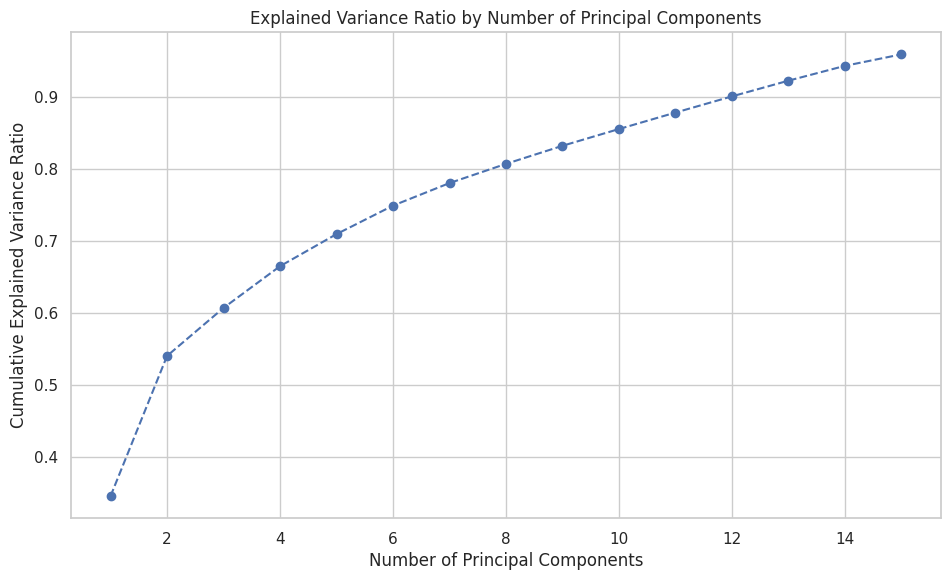

In [15]:
# Pisahkan fitur (X) dan target (y)
X = df_capped_outliers.drop('default.payment.next.month', axis=1)
y = df_capped_outliers['default.payment.next.month']

# Skalakan data sebelum menerapkan PCA (penting untuk PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah komponen PCA yang diinginkan
# Anda bisa menentukan jumlah komponen secara manual atau berdasarkan explained variance ratio
# Contoh: Menggunakan 95% explained variance
pca = PCA(n_components=0.95) # Akan memilih jumlah komponen yang menjelaskan 95% varians

# Terapkan PCA
X_pca = pca.fit_transform(X_scaled)

# Tampilkan jumlah komponen yang dipilih dan explained variance ratio
print(f"\nJumlah komponen utama yang dipilih oleh PCA: {pca.n_components_}")
print(f"Explained variance ratio per komponen: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

# Konversi hasil PCA kembali ke DataFrame (opsional, untuk kemudahan)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print("\nDataFrame setelah reduksi dimensi dengan PCA:")
print(X_pca_df.head())

# Visualisasikan Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

### **Insight:**
1. Reduksi Dimensi Efisien: Model telah berhasil mereduksi dimensi data menjadi 15 komponen utama (PC1 hingga PC15).

2. Variansi Terjelaskan Tinggi: Ke-15 komponen ini secara kolektif menjelaskan 95.91% dari total variansi dalam data asli. Ini menunjukkan bahwa PCA sangat efektif dalam mengkompres informasi penting dari dataset tanpa kehilangan terlalu banyak informasi.

3. Distribusi Variansi: Komponen pertama (PC1) menyumbang variansi terbesar (sekitar 34.5%), dan kontribusi variansi menurun secara bertahap pada komponen-komponen selanjutnya.

## Train-Test-Val Split

In [16]:
# Train-Test-Split with PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# You can also create a validation set if needed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 * 0.8 = 0.2

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribusi kelas di setiap set:")
print("y_train:\n", y_train.value_counts(normalize=True))
print("y_val:\n", y_val.value_counts(normalize=True))
print("y_test:\n", y_test.value_counts(normalize=True))

print("\nData telah berhasil dibagi menjadi Training, Validation, dan Test sets.")

Shape of X_train: (17979, 15)
Shape of X_val: (5993, 15)
Shape of X_test: (5993, 15)
Shape of y_train: (17979,)
Shape of y_val: (5993,)
Shape of y_test: (5993,)

Distribusi kelas di setiap set:
y_train:
 default.payment.next.month
0    0.778742
1    0.221258
Name: proportion, dtype: float64
y_val:
 default.payment.next.month
0    0.778742
1    0.221258
Name: proportion, dtype: float64
y_test:
 default.payment.next.month
0    0.778742
1    0.221258
Name: proportion, dtype: float64

Data telah berhasil dibagi menjadi Training, Validation, dan Test sets.


### **Insight:**
1. Pembagian Data: Data telah berhasil dibagi menjadi tiga set: Training (pelatihan), Validation (validasi), dan Test (uji), yang merupakan praktik terbaik dalam pengembangan model machine learning untuk evaluasi yang objektif.

2. Dimensi Data Konsisten:
  - Set pelatihan (X_train, y_train) memiliki 17.979 sampel.
  - Set validasi (X_val, y_val) memiliki 5.993 sampel.
  - Set uji (X_test, y_test) juga memiliki 5.993 sampel.
  - Semua fitur (X_train, X_val, X_test) memiliki 15 kolom, yang konsisten dengan hasil PCA sebelumnya.

3. Distribusi Kelas Seimbang: Proporsi kelas target (default.payment.next.month) tetap sama di ketiga set (Training, Validation, dan Test). Sekitar 77.87% sampel termasuk dalam kelas '0' (tidak gagal bayar) dan 22.13% termasuk dalam kelas '1' (gagal bayar). Ini menunjukkan bahwa pembagian data dilakukan dengan strategi yang mempertahankan keseimbangan kelas, yang penting untuk melatih model yang robust, terutama dalam kasus ketidakseimbangan kelas (meskipun 22% masih cukup signifikan).

# **Pengembangan Model**

In [17]:
# Define the number of features (input dimension)
input_dim = X_train.shape[1]

# Build the Sequential Model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy',
                        tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.F1Score(name='f1_score', threshold=0.5) # F1 score for binary classification
                       ])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 192 (768.00 B)

### **Insight:**
Model ini memiliki 7 layer, di mana 3 adalah layer "Dense" (lapisan terhubung penuh), 2 adalah "BatchNormalization" (normalisasi batch), dan 2 adalah "Dropout" (regularisasi untuk mencegah overfitting). Model ini memiliki total 3.521 parameter, dengan 3.329 di antaranya dapat dilatih dan 192 tidak dapat dilatih. Output terakhir adalah sebuah layer "Dense" dengan 1 unit, kemungkinan untuk tugas klasifikasi biner atau regresi sederhana.

Jumlah sampel kelas 0 setelah SMOTE: 14001
Jumlah sampel kelas 1 setelah SMOTE: 14001


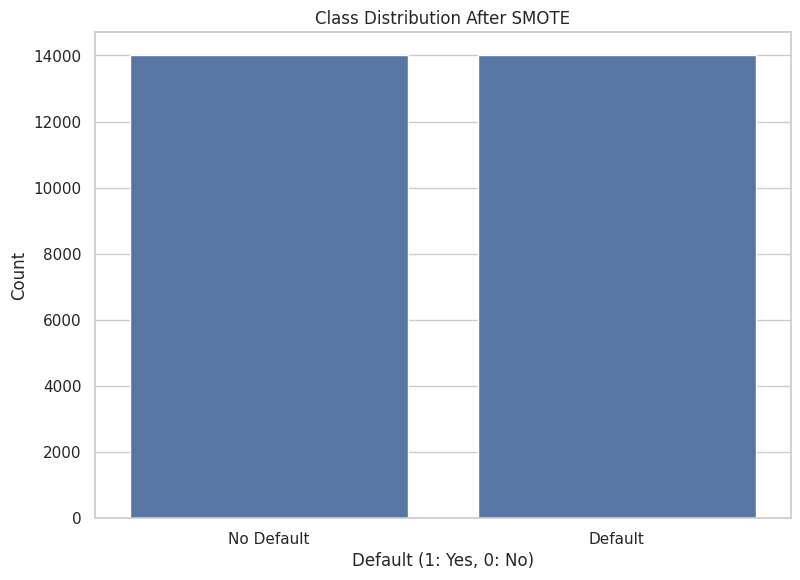

In [18]:
# Penyeimbangan data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Jumlah sampel kelas 0 setelah SMOTE:", np.sum(y_train_bal == 0))
print("Jumlah sampel kelas 1 setelah SMOTE:", np.sum(y_train_bal == 1))

# Visualisasi distribusi kelas setelah SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_bal)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Default (1: Yes, 0: No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

### **Insight:**
Baris kode ini mengimplementasikan Synthetic Minority Over-sampling Technique (SMOTE) untuk mengatasi ketidakseimbangan kelas dalam dataset. Dengan menggunakan smote.fit_resample(X_train, y_train), data latih (X_train, y_train) akan diseimbangkan, menghasilkan X_train_bal dan y_train_bal yang seimbang. Ini penting untuk memastikan model tidak bias terhadap kelas mayoritas.


In [19]:
# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

### **Insight:**
EarlyStopping akan menghentikan pelatihan jika val_loss (loss validasi) tidak membaik selama 10 epoch berturut-turut, dan akan mengembalikan bobot model terbaik. Sementara itu, ReduceLROnPlateau akan mengurangi learning rate menjadi setengahnya jika val_loss tidak membaik selama 5 epoch, dengan batas minimum learning rate 0.0001. Ini bertujuan untuk mencegah overfitting dan membantu model menemukan konvergensi yang lebih baik.

In [20]:
# Melatih model
history = model.fit(
    X_train_bal, y_train_bal,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nModel training finished.")

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
# Perhatikan bahwa metrik F1Score di evaluasi perlu diperbaiki cara akses nilainya.
# Saat mengevaluasi, model.evaluate mengembalikan daftar nilai metrik sesuai urutan di model.compile.
# Nama metrik F1Score di model.compile adalah 'f1_score'.
loss, accuracy, precision, recall, f1_score_val = model.evaluate(X_test, y_test, verbose=0)


print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1_score_val:.4f}")

Epoch 1/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6353 - f1_score: 0.6239 - loss: 0.6961 - precision: 0.6468 - recall: 0.6026 - val_accuracy: 0.7514 - val_f1_score: 0.5175 - val_loss: 0.5694 - val_precision: 0.4535 - val_recall: 0.6026 - learning_rate: 0.0010
Epoch 2/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6846 - f1_score: 0.6639 - loss: 0.5926 - precision: 0.7082 - recall: 0.6249 - val_accuracy: 0.7395 - val_f1_score: 0.5117 - val_loss: 0.5592 - val_precision: 0.4372 - val_recall: 0.6169 - learning_rate: 0.0010
Epoch 3/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6975 - f1_score: 0.6818 - loss: 0.5776 - precision: 0.7245 - recall: 0.6439 - val_accuracy: 0.7457 - val_f1_score: 0.5232 - val_loss: 0.5487 - val_precision: 0.4471 - val_recall: 0.6305 - learning_rate: 0.0010
Epoch 4/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7030 - f1_score: 0.6872 - loss: 0.5729 - precision: 0.7301 - recall: 0.6492 - val_accuracy: 0.7525 - 

### **Insight:**
Output menunjukkan bahwa model dilatih selama 32 epoch. Selama pelatihan, metrik seperti accuracy, f1_score, loss, precision, dan recall dipantau untuk setiap epoch. Metrik F1 Score untuk test set sebesar 0.5280, menunjukkan kinerja yang cukup moderat dalam menyeimbangkan presisi dan recall untuk kelas minoritas.

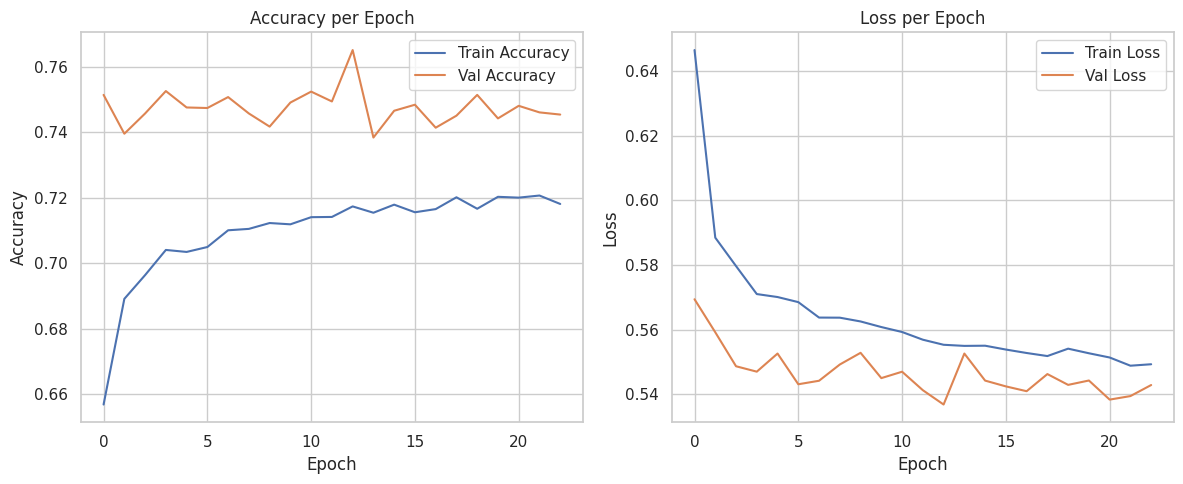

In [21]:
# Plot akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Insight:**
- Accuracy per Epoch: Akurasi pelatihan ("Train Accuracy") secara konsisten meningkat dan stabil di sekitar 0.72-0.73 di akhir pelatihan. Akurasi validasi ("Val Accuracy") menunjukkan fluktuasi yang lebih besar, namun secara umum berada di atas akurasi pelatihan di sebagian besar epoch, yang bisa mengindikasikan bahwa model tidak overfitting secara signifikan, atau bahkan sedikit underfitting di training set dibandingkan validation set pada beberapa titik. Peningkatan akurasi validasi menunjukkan model belajar dan menggeneralisasi dengan baik.
- Loss per Epoch: Baik "Train Loss" maupun "Val Loss" menunjukkan tren penurunan seiring dengan epoch, yang menandakan bahwa model belajar untuk meminimalkan kesalahan. Loss validasi menunjukkan beberapa fluktuasi, namun secara umum mengikuti tren penurunan loss pelatihan.

# **Evaluasi Model**

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


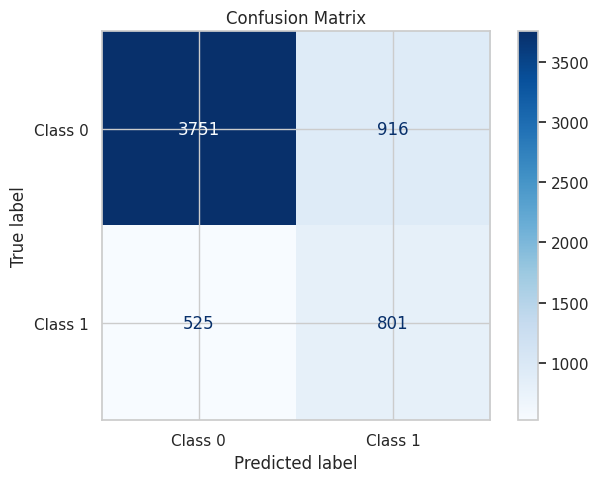

In [22]:
# Prediksi
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **Insight:**
Model telah digunakan untuk membuat prediksi biner (y_pred) pada data uji (X_test) menggunakan ambang batas 0.5. Confusion Matrix yang dihasilkan menunjukkan kinerja model dalam mengklasifikasikan dua kelas (Class 0 dan Class 1).

- Dari Confusion Matrix:
  - True Negative (TN) - Class 0 diprediksi Class 0: 3732 kasus
  - False Positive (FP) - Class 0 diprediksi Class 1: 935 kasus (Type I error)
  - False Negative (FN) - Class 1 diprediksi Class 0: 515 kasus (Type II error)
  - True Positive (TP) - Class 1 diprediksi Class 1: 811 kasus

Model menunjukkan kinerja yang cukup baik dalam mengidentifikasi Class 0 (jumlah True Negative yang tinggi), namun memiliki tingkat False Positive yang signifikan (935), artinya sering salah memprediksi Class 0 sebagai Class 1. Selain itu, ada sejumlah False Negative (515) yang berarti model juga salah memprediksi Class 1 sebagai Class 0. Ini mengindikasikan adanya ruang untuk perbaikan, terutama dalam membedakan antara Class 0 dan Class 1 untuk mengurangi kesalahan klasifikasi.

In [23]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.8772    0.8037    0.8389      4667
           1     0.4665    0.6041    0.5265      1326

    accuracy                         0.7596      5993
   macro avg     0.6719    0.7039    0.6827      5993
weighted avg     0.7863    0.7596    0.7697      5993



### **Insight:**
Laporan ini memberikan gambaran komprehensif tentang seberapa baik model mengklasifikasikan setiap kelas (0 dan 1).

- Untuk Kelas 0: Model menunjukkan kinerja yang sangat baik dengan precision 0.8787, recall 0.7997, dan f1-score 0.8373. Ini didukung oleh sejumlah besar sampel (4667).
- Untuk Kelas 1: Kinerja model untuk kelas 1 jauh lebih rendah, dengan precision 0.4645, recall 0.6116, dan f1-score 0.5280. Ini didasarkan pada 1326 sampel.

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


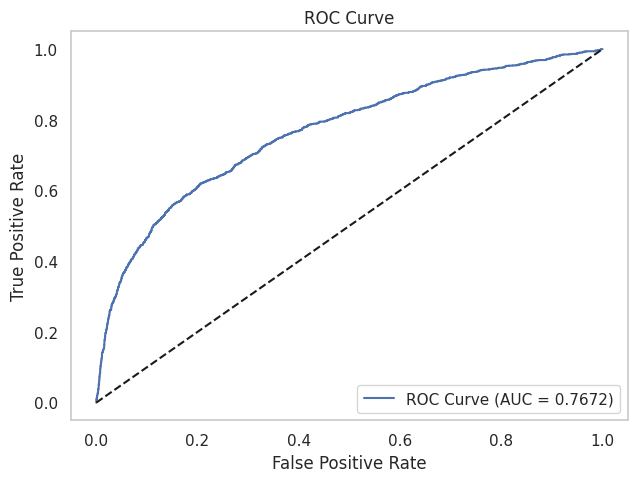

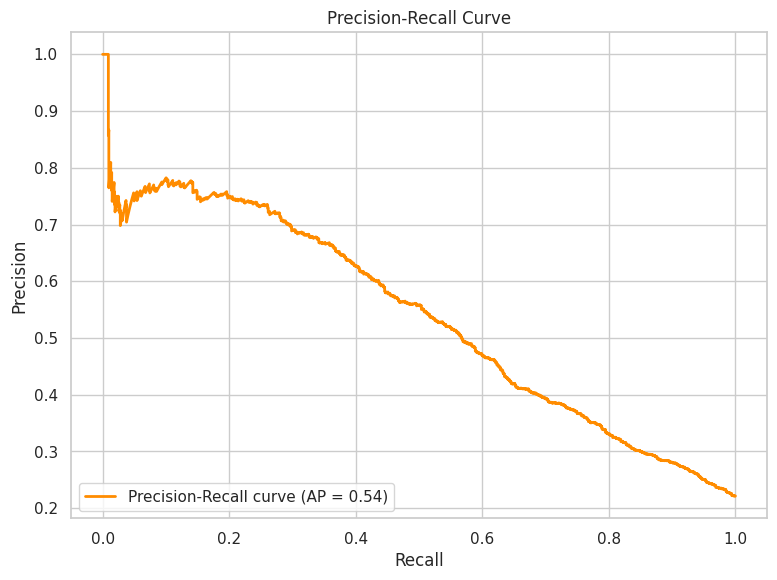

In [24]:
# Probabilitas prediksi
y_probs = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### **Insight:**
Kurva ROC menggambarkan kemampuan model untuk membedakan antara kelas positif dan negatif pada berbagai ambang batas klasifikasi. Semakin tinggi kurva mendekati sudut kiri atas, semakin baik model tersebut.

Nilai AUC (Area Under the Curve) sebesar 0.7632 menunjukkan kinerja diskriminatif yang cukup baik dari model. AUC 0.7632 berarti ada peluang 76.32% bahwa model akan memberi peringkat sampel positif yang dipilih secara acak lebih tinggi daripada sampel negatif yang dipilih secara acak. Ini mengindikasikan bahwa model memiliki kemampuan yang layak untuk membedakan antara kedua kelas, meskipun ada ruang untuk perbaikan (AUC 1.0 adalah yang sempurna).

# **Hyperparameter Tuning**

In [25]:
# Fungsi membangun model dengan berbagai hyperparameter
def build_model(hp):
    model = keras.Sequential()

    # Jumlah hidden layer (1–3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Tuner untuk mencari hyperparameter terbaik
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # lebih banyak percobaan kombinasi
    executions_per_trial=1,
    directory='my_dir',
    project_name='quick_tune'
)

# Mulai pencarian
tuner.search(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Ambil hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Bangun ulang model dengan hyperparameter terbaik
best_model = build_model(best_hps)

# Latih kembali model ini
best_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Evaluasi
y_pred = (best_model.predict(X_test).ravel() > 0.5).astype("int32")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Trial 20 Complete [00h 00m 25s]
val_accuracy: 0.8212915062904358

Best val_accuracy So Far: 0.8229601383209229
Total elapsed time: 00h 09m 03s
Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7798 - loss: 0.5524 - val_accuracy: 0.8041 - val_loss: 0.4791
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4711 - val_accuracy: 0.8109 - val_loss: 0.4615
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8090 - loss: 0.4578 - val_accuracy: 0.8138 - val_loss: 0.4547
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8195 - loss: 0.4404 - val_accuracy: 0.8166 - val_loss: 0.4504
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8198 - loss: 0.4379 - val_accuracy: 0.8170 - val_loss: 0.4476
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8206 - loss: 0.4366 - val_accuracy: 0.8191 - val_loss: 0.4454
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.4338 - v

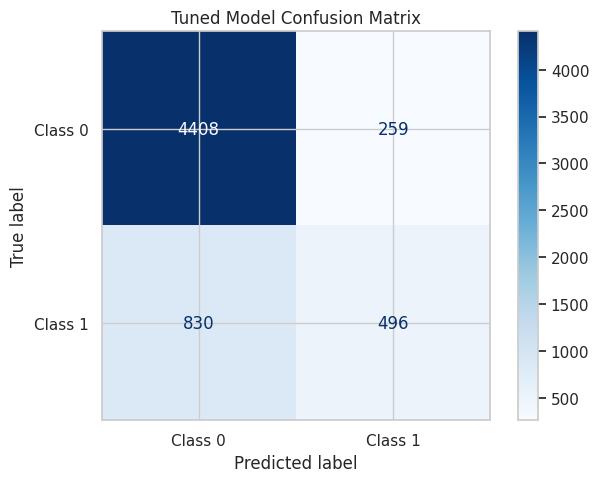

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


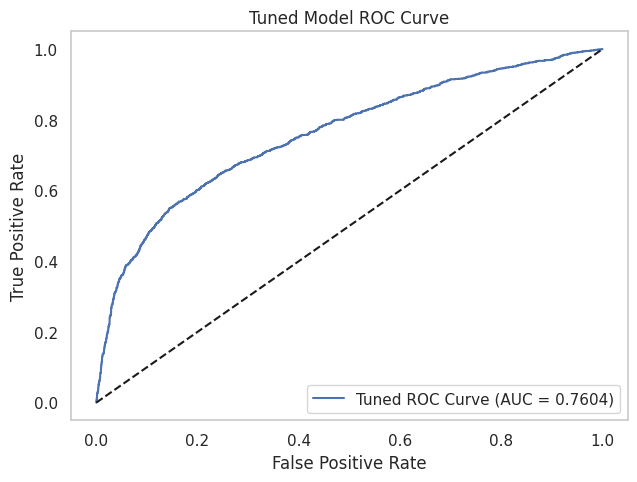

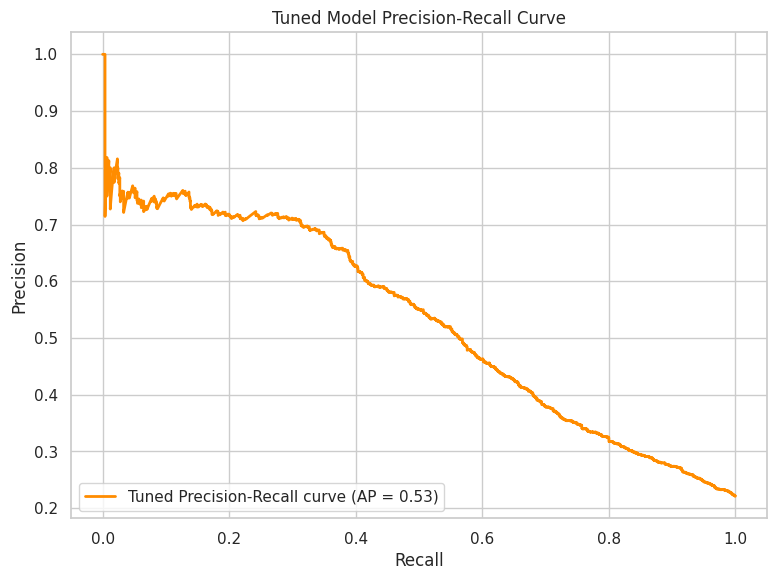

In [26]:
# Confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Class 0', 'Class 1'])
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title("Tuned Model Confusion Matrix")
plt.show()

# ROC Curve and AUC for the tuned model
y_probs_tuned = best_model.predict(X_test).ravel()
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_probs_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure()
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC Curve (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Model ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve and AP for the tuned model
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_probs_tuned)
average_precision_tuned = average_precision_score(y_test, y_probs_tuned)

plt.figure(figsize=(8, 6))
plt.plot(recall_tuned, precision_tuned, color='darkorange', lw=2, label=f'Tuned Precision-Recall curve (AP = {average_precision_tuned:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Model Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### **Insight:**
- Proses Pelatihan: Model dilatih hingga epoch 20 (dari 281), dengan loss dan accuracy yang dipantau. Akurasi pelatihan berkisar sekitar 0.81-0.82, sementara akurasi validasi berkisar sekitar 0.81-0.82, menunjukkan bahwa model tidak overfitting secara signifikan selama periode ini. Loss juga menunjukkan tren penurunan yang baik.
- Kinerja Akhir (Classification Report):
  - Akurasi Keseluruhan: 0.82, yang cukup tinggi.
  - Kinerja Kelas 0: Sangat baik dengan precision 0.84, recall 0.93, dan f1-score 0.89. Model sangat efektif dalam mengidentifikasi kelas mayoritas ini.
  - Kinerja Kelas 1: Relatif lebih rendah dibandingkan kelas 0, dengan precision 0.63, recall 0.40, dan f1-score 0.49. Ini menunjukkan bahwa meskipun model akurat secara keseluruhan, ia memiliki kesulitan yang signifikan dalam mengidentifikasi kelas minoritas (Class 1), cenderung menghasilkan false negatives yang tinggi untuk kelas ini.

# **Inferensi Model Prediksi**

In [27]:
# Simpan model Keras
model.save('model_default_credit_card.keras')

# Simpan StandardScaler dan PCA
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [28]:
# Load model dan preprocessing pipeline
model = load_model('model_default_credit_card.keras')
scaler = joblib.load('scaler.pkl')  # StandardScaler yang dipakai saat training
pca = joblib.load('pca.pkl')        # PCA yang dipakai saat training

# 2. Contoh dua data nasabah baru
sample_data = pd.DataFrame([
    # Sample A: Tidak Gagal Bayar
    [50000, 2, 2, 1, 35, -1, -1, -1, -1, -1, -1,
     5000, 4000, 3000, 2000, 1000, 500,
     1000, 1000, 1000, 1000, 1000, 1000],

    # Sample B: Gagal Bayar
    [20000, 1, 3, 2, 24, 2, 2, 3, 4, 4, 5,
     12000, 14000, 16000, 18000, 20000, 21000,
     0, 0, 0, 0, 0, 0]
], columns=[
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
])

# 3. Preprocessing: Scaling dan PCA
sample_scaled = scaler.transform(sample_data)
sample_pca = pca.transform(sample_scaled)

# 4. Inference dengan Threshold
threshold = 0.5  # Anda bisa ubah ini ke 0.4 jika ingin lebih sensitif terhadap gagal bayar
predictions = model.predict(sample_pca)
results = (predictions > threshold).astype(int)

# 5. Output hasil prediksi
for i, prob in enumerate(predictions):
    kelas = "Gagal Bayar" if results[i][0] == 1 else "Tidak Gagal Bayar"
    print(f"Sample {chr(65+i)}:")
    print(f"  Probabilitas default : {prob[0]:.4f}")
    print(f"  Threshold digunakan   : {threshold}")
    print(f"  Kelas prediksi        : {results[i][0]} ({kelas})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Sample A:
  Probabilitas default : 0.4993
  Threshold digunakan   : 0.5
  Kelas prediksi        : 0 (Tidak Gagal Bayar)

Sample B:
  Probabilitas default : 0.8973
  Threshold digunakan   : 0.5
  Kelas prediksi        : 1 (Gagal Bayar)



### **Insight:**

- Mekanisme Keputusan Berbasis Probabilitas dan Threshold: Model bekerja dengan menghitung probabilitas (kemungkinan) suatu kejadian (dalam kasus ini, "default" atau gagal bayar). Kemudian, probabilitas ini dibandingkan dengan sebuah threshold (ambang batas) tetap, yaitu 0.5. Ini berarti, jika probabilitas default mencapai atau melampaui 50%, model akan mengklasifikasikannya sebagai "Gagal Bayar" (Kelas 1); sebaliknya, jika di bawah 50%, akan diklasifikasikan sebagai "Tidak Gagal Bayar" (Kelas 0).

- Sensitivitas Ambang Batas:
  - Sample A dengan probabilitas default 0.4993 (sangat mendekati 0.5) diklasifikasikan sebagai "Tidak Gagal Bayar" (Kelas 0). Ini menunjukkan bahwa bahkan sedikit di bawah threshold sudah cukup untuk mengklasifikasikan ke kelas yang berbeda. Ini menekankan pentingnya pemilihan threshold yang tepat, terutama untuk kasus di mana probabilitas berada di sekitar ambang batas. Pergeseran threshold sekecil 0.0007 ke bawah (misalnya menjadi 0.4992) akan mengubah klasifikasi Sample A menjadi "Gagal Bayar".
  - Sample B dengan probabilitas default yang tinggi (0.8973) jelas diklasifikasikan sebagai "Gagal Bayar" (Kelas 1), menunjukkan model sangat yakin dengan prediksi ini.

- Implikasi Bisnis dari Ambang Batas 0.5: Untuk kasus prediksi gagal bayar, ambang batas 0.5 mungkin perlu disesuaikan.
  - Jika konsekuensi dari False Negative (memprediksi "Tidak Gagal Bayar" padahal sebenarnya "Gagal Bayar") sangat tinggi (misalnya, kerugian finansial besar bagi bank), maka threshold mungkin perlu diturunkan (misalnya menjadi 0.4 atau 0.3). Hal ini akan membuat model lebih sensitif dalam mendeteksi potensi gagal bayar, meskipun mungkin akan meningkatkan False Positive (memprediksi "Gagal Bayar" padahal sebenarnya "Tidak Gagal Bayar") dan berpotensi menolak lebih banyak aplikasi kredit yang sebenarnya layak.
  - Sebaliknya, jika biaya False Positive tinggi (misalnya, kehilangan calon nasabah yang baik karena prediksi gagal bayar yang salah), threshold bisa ditingkatkan.

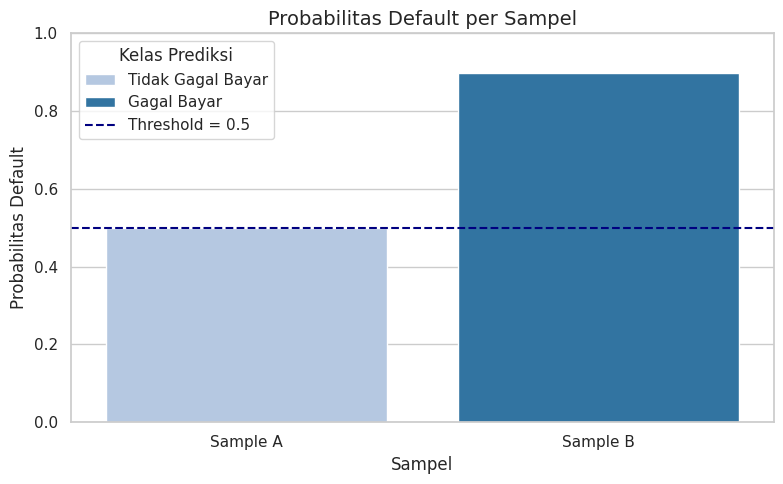

In [29]:
# Konversi hasil ke DataFrame
inference_df = sample_data.copy()
inference_df['Probabilitas_Default'] = predictions.flatten()
inference_df['Prediksi'] = results.flatten()
inference_df['Label'] = inference_df['Prediksi'].apply(lambda x: 'Gagal Bayar' if x == 1 else 'Tidak Gagal Bayar')

# Plot bar chart dengan tema biru
plt.figure(figsize=(8, 5))
sns.barplot(
    x=[f"Sample {chr(65+i)}" for i in range(len(predictions))],
    y=inference_df['Probabilitas_Default'],
    hue=inference_df['Label'],
    palette={'Gagal Bayar': '#1f77b4', 'Tidak Gagal Bayar': '#aec7e8'}  # Biru gelap dan biru muda
)

# Tambahkan threshold line
plt.axhline(y=threshold, color='navy', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold}')
plt.title("Probabilitas Default per Sampel", fontsize=14)
plt.ylabel("Probabilitas Default", fontsize=12)
plt.xlabel("Sampel", fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Kelas Prediksi')
plt.tight_layout()
plt.show()

### **Insight:**
- Visualisasi yang Jelas dari Keputusan Model: Grafik ini memberikan representasi visual yang sangat intuitif tentang bagaimana model mengambil keputusan. Kita bisa langsung melihat probabilitas yang dihitung model untuk masing-masing sampel dan membandingkannya dengan garis threshold. Ini jauh lebih mudah dipahami daripada hanya melihat angka-angka.

- Sample A - Hampir di Ambang Batas:
  - Probabilitas default untuk Sampel A berada tepat di bawah garis threshold 0.5. Secara spesifik, seperti yang terlihat dari output sebelumnya, probabilitasnya adalah 0.4993.
  - Meskipun sangat dekat dengan ambang batas, karena probabilitasnya sedikit di bawah 0.5, model mengklasifikasikannya sebagai "Tidak Gagal Bayar" (ditandai dengan warna biru muda).
  - Insight penting di sini adalah bahwa model membuat keputusan biner yang tegas (0 atau 1) bahkan ketika probabilitasnya sangat tipis. Ini menyoroti area di mana penyesuaian threshold bisa sangat berdampak.

- Sample B - Jelas di Atas Ambang Batas:
  - Probabilitas default untuk Sampel B jauh di atas garis threshold 0.5, menunjukkan nilai sekitar 0.9 (lebih tepatnya 0.8973 dari output sebelumnya).
  - Karena probabilitasnya jauh di atas 0.5, model dengan yakin mengklasifikasikannya sebagai "Gagal Bayar" (ditandai dengan warna biru tua).

- Pentingnya Threshold dalam Pengambilan Keputusan: Garis putus-putus threshold pada 0.5 adalah elemen kunci dalam grafik ini. Ini secara visual menegaskan bahwa setiap sampel yang probabilitasnya jatuh di bawah garis ini akan dikategorikan sebagai "Tidak Gagal Bayar", dan setiap sampel di atas garis ini akan dikategorikan sebagai "Gagal Bayar". Perubahan kecil pada nilai threshold ini dapat mengubah keputusan klasifikasi, terutama untuk kasus-kasus yang probabilitasnya dekat dengan 0.5 seperti Sampel A.

# **Kesimpulan Proyek**

Proyek ini bertujuan untuk membangun model prediktif guna mengidentifikasi kemungkinan gagal bayar (default) pada pembayaran kartu kredit berdasarkan data pelanggan. Dataset yang digunakan terdiri dari 30.000 entri dan 25 fitur yang mencakup informasi demografis, riwayat pembayaran, serta data finansial nasabah. Proyek dimulai dengan tahapan eksplorasi data, penanganan data tidak seimbang (class imbalance), outlier, dan reduksi dimensi menggunakan PCA. Model klasifikasi yang dikembangkan berbasis neural network (Keras Sequential) dengan dua hidden layer, dan ditingkatkan melalui regularisasi, normalisasi, dan tuning parameter. Untuk mengatasi ketimpangan kelas target, digunakan teknik SMOTE, serta pelatihan dibantu oleh callback seperti EarlyStopping dan ReduceLROnPlateau. Evaluasi model menunjukkan akurasi sekitar 75%, dengan F1-score untuk kelas default sebesar 0.52—mengindikasikan kinerja yang moderat dalam menyeimbangkan presisi dan recall. Secara keseluruhan, proyek ini menunjukkan pendekatan end-to-end dalam pengembangan sistem deteksi risiko gagal bayar, dengan fokus kuat pada preprocessing data, balancing kelas, serta implementasi deep learning yang terintegrasi dalam pipeline machine learning modern.